In [ ]:
!git clone https://github.com/lehoangphuongnhi/Thesis.git

Cloning into 'Thesis'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 234 (delta 22), reused 18 (delta 7), pack-reused 181
Receiving objects: 100% (234/234), 11.15 MiB | 16.64 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [ ]:
cd Thesis

/content/Thesis


In [ ]:
!make start-gpu
!pip install wget

make: *** No rule to make target 'start-gpu'.  Stop.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=7e6d38af8b25642155f652e952ca4595df84fd261395b71488b9e698fc0d0510
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from Code.tab_model import TabNetClassifier
from Code.generate_data import generate_dataset
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
np.random.seed(0)

import os
import wget
from pathlib import Path
import shutil
import gzip

from matplotlib import pyplot as plt
%matplotlib inline

# Generate data

In [ ]:
x_train = {} 
y_train = {}
g_train = {}
x_test = {}
y_test = {}
g_test = {}
x_val = {}
y_val = {}

In [ ]:
data_type = ['syn1', 'syn2', 'syn3', 'syn4', 'syn5', 'syn6']

In [ ]:
#Tạo 6 synthetic data 
for i, dt in enumerate(data_type,1): 
  x_train[i], y_train[i], g_train[i] = generate_dataset(data_type = dt, seed=0)
  x_test[i], y_test[i], g_test[i] = generate_dataset(data_type = dt, seed=1)
  y_train[i] = ((np.argmax(y_train[i], axis=1)).reshape(-1)) #biến đổi lại target
  y_test[i] = ((np.argmax(y_test[i], axis=1)).reshape(-1))
  x_train[i], x_val[i], y_train[i], y_val[i] = train_test_split(x_train[i], y_train[i], test_size=0.1, random_state=42)

In [ ]:
feature_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

# Network parameters

## Syn1

In [ ]:
clf_1 = TabNetClassifier(
    n_d=16, n_a=16, n_steps=4,
    gamma=2, n_ind=2, n_shared=2,
    lambda_sparse=0.02, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


## Syn2+3

In [ ]:
clf_23 = TabNetClassifier(
    n_d=16, n_a=16, n_steps=4,
    gamma=2, n_ind=2, n_shared=2,
    lambda_sparse=0.01, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


## Syn4+5+6

In [ ]:
clf_456 = TabNetClassifier(
    n_d=16, n_a=16, n_steps=5,
    gamma=1.5, n_ind=2, n_shared=2,
    lambda_sparse=0.005, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


# Training + Predictions

In [ ]:
max_epochs = 500 if not os.getenv("CI", False) else 2

## Syn1

In [ ]:
clf_1.fit(
    X_train=x_train[1], y_train=y_train[1],
    eval_set=[(x_train[1], y_train[1]), (x_val[1], y_val[1])],
    eval_name=['train', 'test'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
) 

epoch 0  | loss: 0.93995 | train_auc: 0.51773 | test_auc: 0.50781 |  0:00:01s
epoch 1  | loss: 0.77822 | train_auc: 0.53765 | test_auc: 0.52715 |  0:00:02s
epoch 2  | loss: 0.72991 | train_auc: 0.54906 | test_auc: 0.53211 |  0:00:03s
epoch 3  | loss: 0.71358 | train_auc: 0.55095 | test_auc: 0.53251 |  0:00:04s
epoch 4  | loss: 0.70631 | train_auc: 0.55846 | test_auc: 0.53275 |  0:00:05s
epoch 5  | loss: 0.7014  | train_auc: 0.56951 | test_auc: 0.54308 |  0:00:06s
epoch 6  | loss: 0.69611 | train_auc: 0.56501 | test_auc: 0.54164 |  0:00:07s
epoch 7  | loss: 0.69628 | train_auc: 0.56435 | test_auc: 0.54084 |  0:00:09s
epoch 8  | loss: 0.69627 | train_auc: 0.5577  | test_auc: 0.53882 |  0:00:11s
epoch 9  | loss: 0.69459 | train_auc: 0.57299 | test_auc: 0.54507 |  0:00:12s
epoch 10 | loss: 0.69113 | train_auc: 0.58474 | test_auc: 0.55103 |  0:00:13s
epoch 11 | loss: 0.68829 | train_auc: 0.58853 | test_auc: 0.55997 |  0:00:14s
epoch 12 | loss: 0.68789 | train_auc: 0.5954  | test_auc: 0.5736

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf_1.predict_proba(x_test[1])
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test[1])

print(f"FINAL TEST SCORE FOR SYN1 : {test_auc}")

FINAL TEST SCORE FOR SYN1 : 0.690477928874327


## Syn2

In [ ]:
clf_23.fit(
    X_train=x_train[2], y_train=y_train[2],
    eval_set=[(x_train[2], y_train[2]), (x_val[2], y_val[2])],
    eval_name=['train', 'test'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
) 

epoch 0  | loss: 0.90533 | train_auc: 0.60881 | test_auc: 0.60146 |  0:00:01s
epoch 1  | loss: 0.70551 | train_auc: 0.62916 | test_auc: 0.63594 |  0:00:02s
epoch 2  | loss: 0.66434 | train_auc: 0.68216 | test_auc: 0.68398 |  0:00:03s
epoch 3  | loss: 0.6267  | train_auc: 0.71265 | test_auc: 0.72323 |  0:00:04s
epoch 4  | loss: 0.62164 | train_auc: 0.72477 | test_auc: 0.72662 |  0:00:06s
epoch 5  | loss: 0.60587 | train_auc: 0.72751 | test_auc: 0.73238 |  0:00:07s
epoch 6  | loss: 0.59952 | train_auc: 0.73782 | test_auc: 0.73662 |  0:00:08s
epoch 7  | loss: 0.59699 | train_auc: 0.74885 | test_auc: 0.74814 |  0:00:09s
epoch 8  | loss: 0.58998 | train_auc: 0.7499  | test_auc: 0.75154 |  0:00:10s
epoch 9  | loss: 0.58461 | train_auc: 0.75878 | test_auc: 0.76176 |  0:00:11s
epoch 10 | loss: 0.58789 | train_auc: 0.76105 | test_auc: 0.75782 |  0:00:13s
epoch 11 | loss: 0.57695 | train_auc: 0.76706 | test_auc: 0.76752 |  0:00:14s
epoch 12 | loss: 0.57214 | train_auc: 0.77778 | test_auc: 0.7777

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf_23.predict_proba(x_test[2])
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test[2])

print(f"FINAL TEST SCORE FOR SYN2 : {test_auc}")

FINAL TEST SCORE FOR SYN2 : 0.8957828468113468


## Syn3

In [ ]:
clf_23.fit(
    X_train=x_train[3], y_train=y_train[3],
    eval_set=[(x_train[3], y_train[3]), (x_val[3], y_val[3])],
    eval_name=['train', 'test'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
) 

epoch 0  | loss: 0.87195 | train_auc: 0.66059 | test_auc: 0.65995 |  0:00:01s
epoch 1  | loss: 0.68803 | train_auc: 0.70363 | test_auc: 0.70816 |  0:00:02s
epoch 2  | loss: 0.61883 | train_auc: 0.75551 | test_auc: 0.76303 |  0:00:03s
epoch 3  | loss: 0.58918 | train_auc: 0.7927  | test_auc: 0.79504 |  0:00:04s
epoch 4  | loss: 0.56204 | train_auc: 0.80197 | test_auc: 0.80614 |  0:00:05s
epoch 5  | loss: 0.55339 | train_auc: 0.81436 | test_auc: 0.81835 |  0:00:07s
epoch 6  | loss: 0.53468 | train_auc: 0.82129 | test_auc: 0.82308 |  0:00:08s
epoch 7  | loss: 0.52782 | train_auc: 0.82228 | test_auc: 0.8253  |  0:00:09s
epoch 8  | loss: 0.51213 | train_auc: 0.82959 | test_auc: 0.82865 |  0:00:10s
epoch 9  | loss: 0.50949 | train_auc: 0.84225 | test_auc: 0.84039 |  0:00:11s
epoch 10 | loss: 0.50165 | train_auc: 0.84141 | test_auc: 0.84334 |  0:00:13s
epoch 11 | loss: 0.49414 | train_auc: 0.84875 | test_auc: 0.84885 |  0:00:14s
epoch 12 | loss: 0.48873 | train_auc: 0.85019 | test_auc: 0.8505

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf_23.predict_proba(x_test[3])
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test[3])

print(f"FINAL TEST SCORE FOR SYN3 : {test_auc}")

FINAL TEST SCORE FOR SYN3 : 0.9020911465299337


## Syn4

In [ ]:
clf_456.fit(
    X_train=x_train[4], y_train=y_train[4],
    eval_set=[(x_train[4], y_train[4]), (x_val[4], y_val[4])],
    eval_name=['train', 'test'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
) 

epoch 0  | loss: 0.96886 | train_auc: 0.55028 | test_auc: 0.54597 |  0:00:01s
epoch 1  | loss: 0.77292 | train_auc: 0.57377 | test_auc: 0.55636 |  0:00:02s
epoch 2  | loss: 0.73129 | train_auc: 0.57977 | test_auc: 0.56401 |  0:00:03s
epoch 3  | loss: 0.71364 | train_auc: 0.59044 | test_auc: 0.58102 |  0:00:05s
epoch 4  | loss: 0.69303 | train_auc: 0.60106 | test_auc: 0.58733 |  0:00:06s
epoch 5  | loss: 0.68773 | train_auc: 0.61159 | test_auc: 0.59665 |  0:00:07s
epoch 6  | loss: 0.68468 | train_auc: 0.61624 | test_auc: 0.6012  |  0:00:09s
epoch 7  | loss: 0.67514 | train_auc: 0.61898 | test_auc: 0.60488 |  0:00:10s
epoch 8  | loss: 0.67382 | train_auc: 0.62717 | test_auc: 0.61082 |  0:00:12s
epoch 9  | loss: 0.67299 | train_auc: 0.63186 | test_auc: 0.61403 |  0:00:13s
epoch 10 | loss: 0.67504 | train_auc: 0.6347  | test_auc: 0.62139 |  0:00:14s
epoch 11 | loss: 0.66532 | train_auc: 0.6416  | test_auc: 0.6211  |  0:00:15s
epoch 12 | loss: 0.66657 | train_auc: 0.64421 | test_auc: 0.6219

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf_456.predict_proba(x_test[4])
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test[4])

print(f"FINAL TEST SCORE FOR SYN3 : {test_auc}")

FINAL TEST SCORE FOR SYN3 : 0.8004079936027529


## Syn5

In [ ]:
clf_456.fit(
    X_train=x_train[5], y_train=y_train[5],
    eval_set=[(x_train[5], y_train[5]), (x_val[5], y_val[5])],
    eval_name=['train', 'test'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
) 

epoch 0  | loss: 0.96719 | train_auc: 0.53351 | test_auc: 0.53218 |  0:00:01s
epoch 1  | loss: 0.78439 | train_auc: 0.58747 | test_auc: 0.58271 |  0:00:02s
epoch 2  | loss: 0.72157 | train_auc: 0.60465 | test_auc: 0.60036 |  0:00:04s
epoch 3  | loss: 0.69958 | train_auc: 0.62078 | test_auc: 0.61967 |  0:00:05s
epoch 4  | loss: 0.68434 | train_auc: 0.6322  | test_auc: 0.63064 |  0:00:07s
epoch 5  | loss: 0.67604 | train_auc: 0.64226 | test_auc: 0.63528 |  0:00:08s
epoch 6  | loss: 0.66763 | train_auc: 0.64932 | test_auc: 0.64042 |  0:00:09s
epoch 7  | loss: 0.66692 | train_auc: 0.6571  | test_auc: 0.64172 |  0:00:11s
epoch 8  | loss: 0.66192 | train_auc: 0.65745 | test_auc: 0.64217 |  0:00:12s
epoch 9  | loss: 0.65815 | train_auc: 0.66598 | test_auc: 0.64822 |  0:00:13s
epoch 10 | loss: 0.65467 | train_auc: 0.66909 | test_auc: 0.65523 |  0:00:15s
epoch 11 | loss: 0.65294 | train_auc: 0.66837 | test_auc: 0.65776 |  0:00:16s
epoch 12 | loss: 0.64754 | train_auc: 0.67654 | test_auc: 0.6667

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf_456.predict_proba(x_test[5])
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test[5])

print(f"FINAL TEST SCORE FOR SYN3 : {test_auc}")

FINAL TEST SCORE FOR SYN3 : 0.8103300655113768


## Syn6

In [ ]:
clf_456.fit(
    X_train=x_train[6], y_train=y_train[6],
    eval_set=[(x_train[6], y_train[6]), (x_val[6], y_val[6])],
    eval_name=['train', 'test'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
) 

epoch 0  | loss: 0.95111 | train_auc: 0.54905 | test_auc: 0.551   |  0:00:01s
epoch 1  | loss: 0.74708 | train_auc: 0.64224 | test_auc: 0.62133 |  0:00:02s
epoch 2  | loss: 0.68258 | train_auc: 0.64794 | test_auc: 0.64381 |  0:00:04s
epoch 3  | loss: 0.67255 | train_auc: 0.65432 | test_auc: 0.65093 |  0:00:05s
epoch 4  | loss: 0.66126 | train_auc: 0.68171 | test_auc: 0.66624 |  0:00:07s
epoch 5  | loss: 0.64332 | train_auc: 0.68709 | test_auc: 0.66029 |  0:00:08s
epoch 6  | loss: 0.64244 | train_auc: 0.68911 | test_auc: 0.66558 |  0:00:09s
epoch 7  | loss: 0.63831 | train_auc: 0.69352 | test_auc: 0.67155 |  0:00:11s
epoch 8  | loss: 0.63836 | train_auc: 0.69457 | test_auc: 0.68097 |  0:00:12s
epoch 9  | loss: 0.63998 | train_auc: 0.69435 | test_auc: 0.68335 |  0:00:14s
epoch 10 | loss: 0.63348 | train_auc: 0.70253 | test_auc: 0.68371 |  0:00:15s
epoch 11 | loss: 0.63522 | train_auc: 0.69933 | test_auc: 0.68199 |  0:00:16s
epoch 12 | loss: 0.63237 | train_auc: 0.69992 | test_auc: 0.6810

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf_456.predict_proba(x_test[6])
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test[6])

print(f"FINAL TEST SCORE FOR SYN3 : {test_auc}")

FINAL TEST SCORE FOR SYN3 : 0.8847183769836433


# Global explainability: feat importance summing to 1

##Syn1

In [ ]:
clf_1.feature_importances_

array([0.32744016, 0.37521136, 0.04179145, 0.0318084 , 0.03198774,
       0.04405359, 0.05325607, 0.00786892, 0.01728238, 0.02458776,
       0.04471217])

##Syn2

In [ ]:
clf_23.feature_importances_

array([0.00051063, 0.024769  , 0.22928706, 0.13267803, 0.20607818,
       0.23668063, 0.04341001, 0.11312501, 0.01173651, 0.00123044,
       0.0004945 ])

In [ ]:
clf_2 = TabNetClassifier()
clf_2.load_model('syn2.zip')

Device used : cpu


In [ ]:
feature_importances = pd.DataFrame()
feature_importances["feature"] = feature_names
feature_importances["importance"] = clf_2._compute_feature_importances(x_test[2])

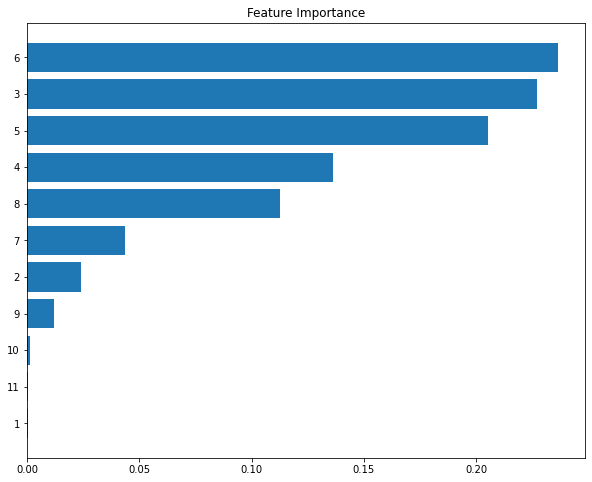

In [ ]:
feature_importances.sort_values(
    by = "importance", 
    ascending = True, 
    inplace = True
)
plt.figure(figsize = (10, 8))
plt.barh(feature_importances["feature"], feature_importances["importance"])
plt.title("Feature Importance")
plt.show()

##Syn3

In [ ]:
clf_23.feature_importances_

array([1.10967264e-03, 1.60995679e-02, 4.29458369e-04, 1.03279987e-06,
       2.57034239e-02, 2.05018934e-02, 3.25361013e-01, 7.96376805e-02,
       2.30808346e-01, 2.99490404e-01, 8.57507659e-04])

In [ ]:
feature_importances = pd.DataFrame()
feature_importances["importance"] = clf_23.feature_importances_

In [ ]:
feature_importances

,importance
0,0.001110
1,0.016100
2,0.000429
3,0.000001
4,0.025703
5,0.020502
6,0.325361
7,0.079638
8,0.230808
9,0.299490


##Syn4

In [ ]:
clf_456.feature_importances_

array([0.07802987, 0.0383342 , 0.11028655, 0.19178121, 0.15384658,
       0.10298088, 0.03819265, 0.0023167 , 0.05447621, 0.0282998 ,
       0.20145534])

In [ ]:
clf_4 = TabNetClassifier()
clf_4.load_model('syn4.zip')

Device used : cpu


In [ ]:
feature_importances = pd.DataFrame()
feature_importances["feature"] = feature_names
feature_importances["importance"] = clf_4._compute_feature_importances(x_test[4])

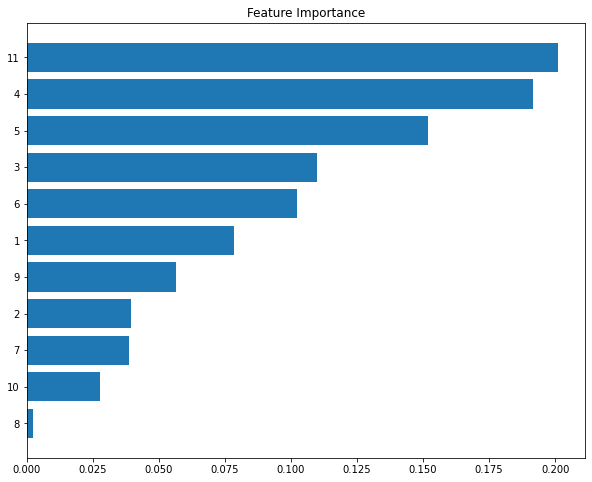

In [ ]:
feature_importances.sort_values(
    by = "importance", 
    ascending = True, 
    inplace = True
)
plt.figure(figsize = (10, 8))
plt.barh(feature_importances["feature"], feature_importances["importance"])
plt.title("Feature Importance")
plt.show()

##Syn5

In [ ]:
clf_456.feature_importances_

array([0.0331379 , 0.02531648, 0.02705382, 0.06629167, 0.05412278,
       0.0023394 , 0.2760958 , 0.07638258, 0.0298415 , 0.17675205,
       0.23266602])

##Syn6

In [ ]:
clf_456.feature_importances_

array([0.04595776, 0.02922129, 0.11491674, 0.08093207, 0.08959469,
       0.06786069, 0.09313624, 0.02148245, 0.08851845, 0.08749591,
       0.28088372])

# Local explainability and masks

## Syn1

In [ ]:
explain_matrix, masks = clf_1.explain(x_test[1])

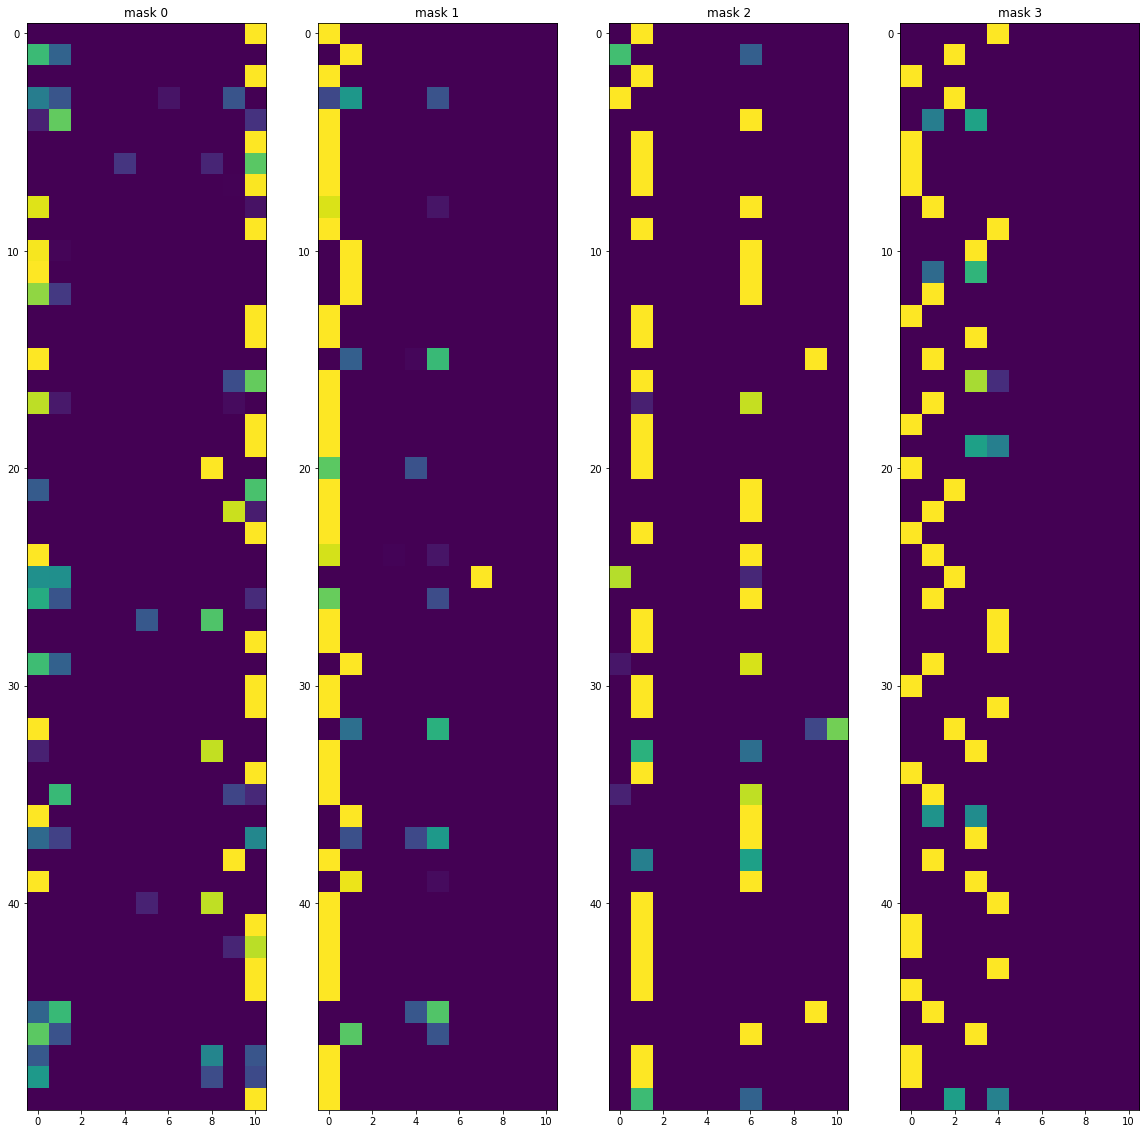

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20,20))

for i in range(4):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

## Syn2

In [ ]:
explain_matrix, masks = clf_23.explain(x_test[2])

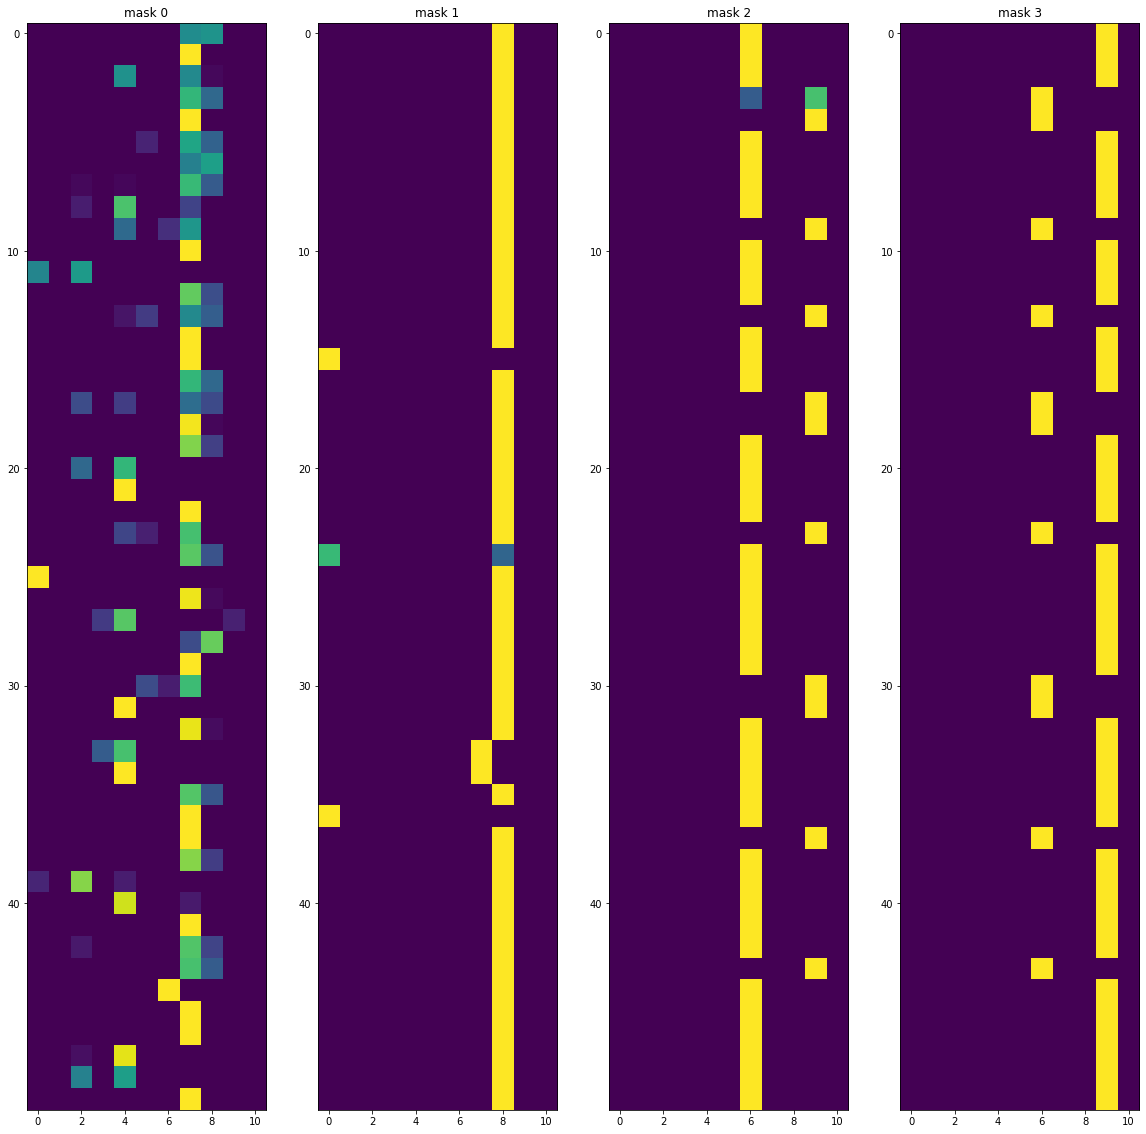

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20,20))

for i in range(4):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

## Syn3

In [ ]:
clf_3 = TabNetClassifier()
clf_3.load_model('syn3.zip')

/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
explain_matrix, masks = clf_3.explain(x_test[3])

Text(0.5, 1.0, 'mask')

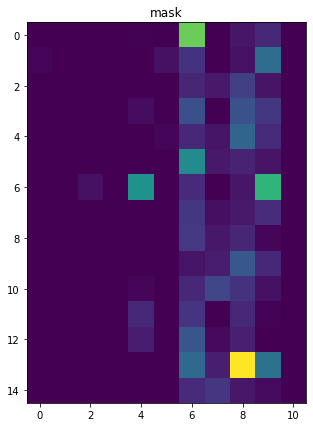

In [ ]:
fig, axs = plt.subplots(1, figsize=(5,20))


axs.imshow(explain_matrix[:15])
axs.set_title(f"mask")

In [ ]:
explain_matrix, masks = clf_23.explain(x_test[3])

Text(0.5, 1.0, 'mask')

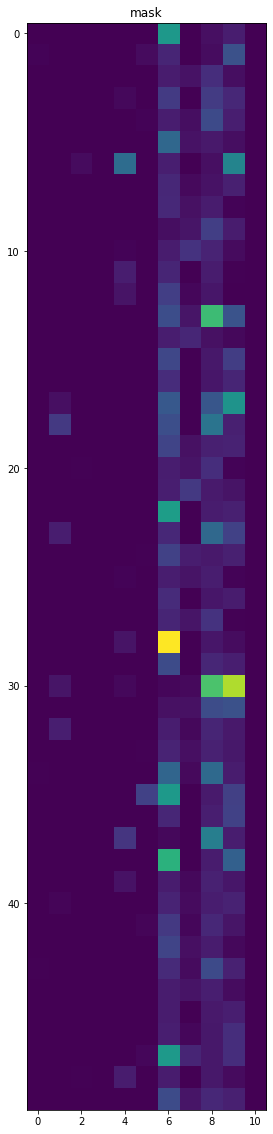

In [ ]:
fig, axs = plt.subplots(1, figsize=(20,20))


axs.imshow(explain_matrix[:50])
axs.set_title(f"mask")

In [ ]:
explain_matrix, masks = clf_23.explain(x_test[3])

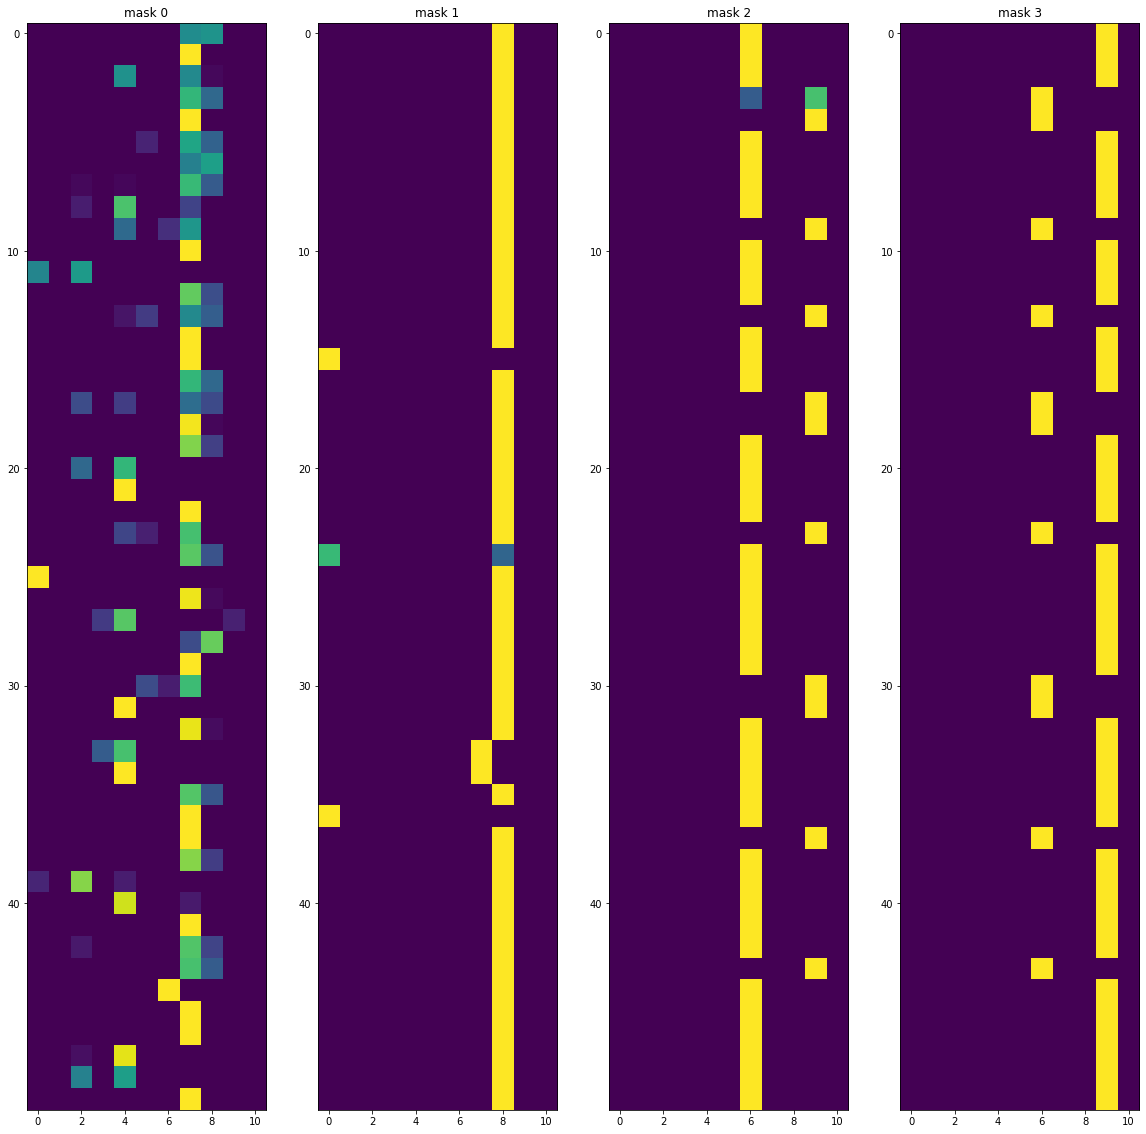

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20,20))

for i in range(4):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

## Syn4

In [ ]:
explain_matrix, masks = clf_456.explain(x_test[4])

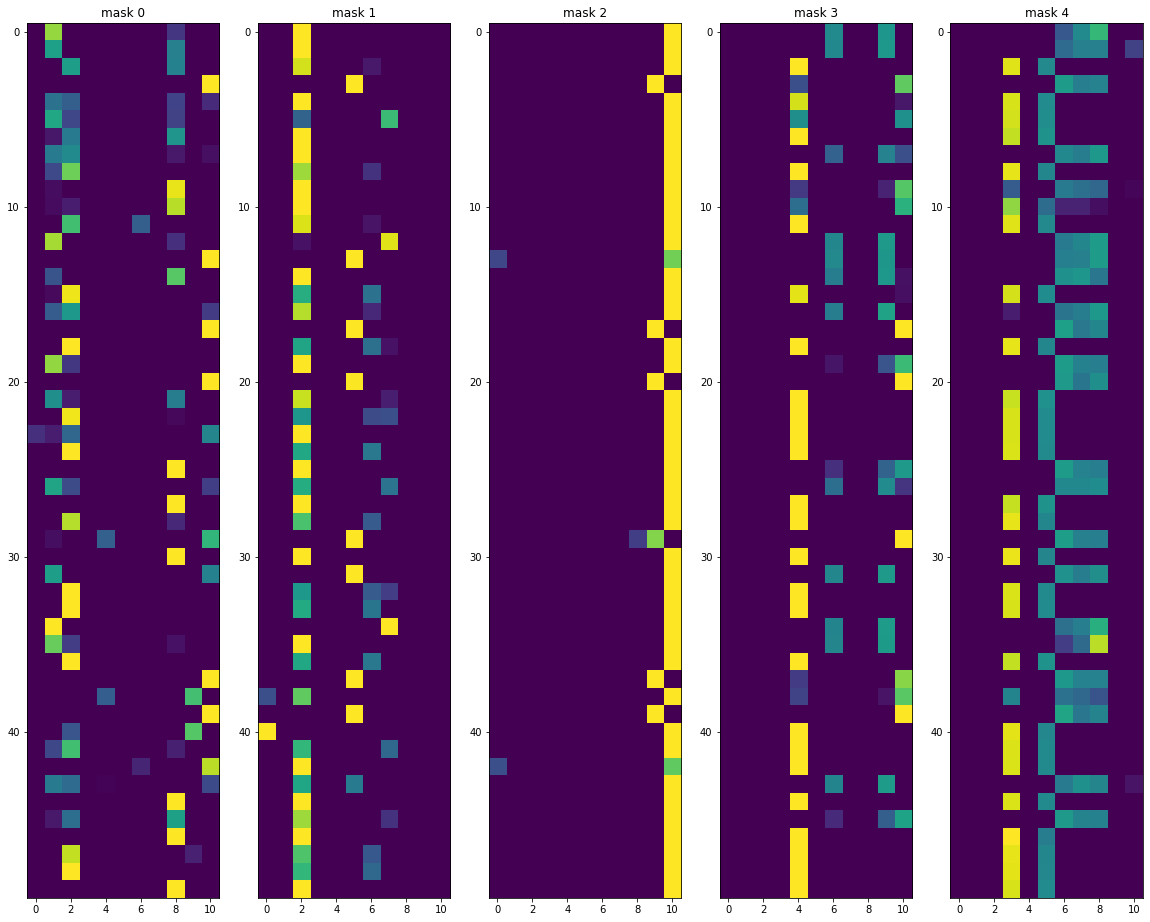

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(5):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [ ]:
clf_4 = TabNetClassifier()
clf_4.load_model('/content/syn4.zip')

Device used : cuda


In [ ]:
explain_matrix, masks = clf_4.explain(x_test[4])

([<matplotlib.axis.XTick at 0x7f258c80a590>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11')])

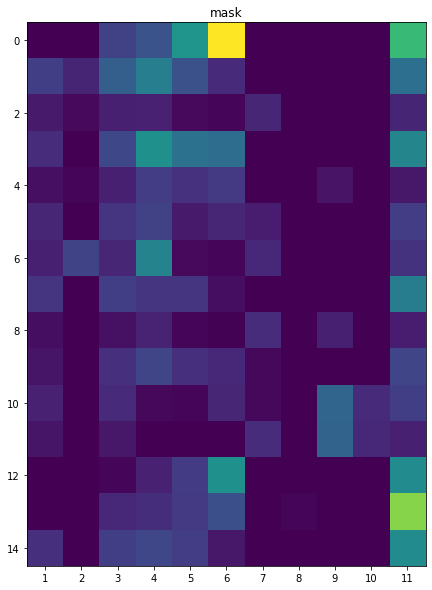

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,10))


im = axs.imshow(explain_matrix[:15])
axs.set_title(f"mask")
plt.xticks(range(len(feature_names)), feature_names)

## Syn5

In [ ]:
explain_matrix, masks = clf_456.explain(x_test[5])

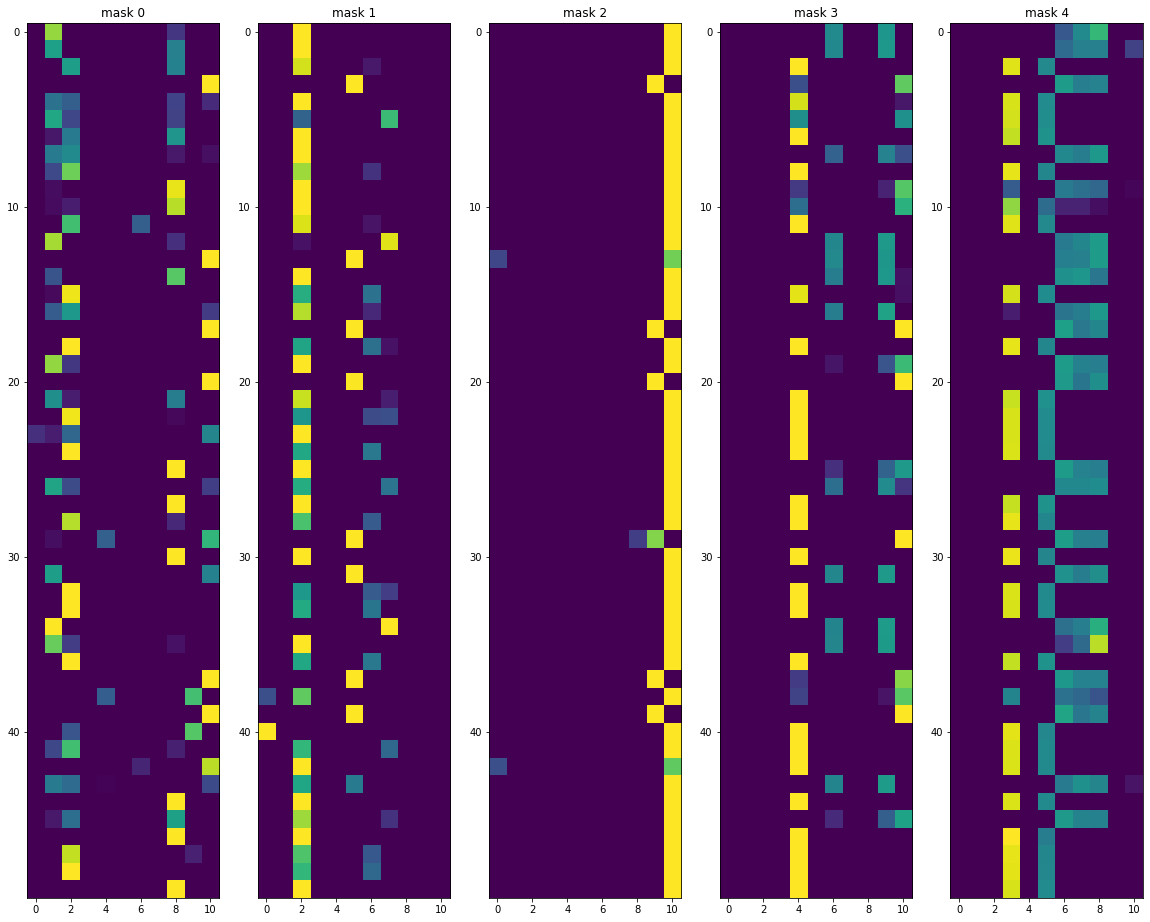

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(5):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

## Syn6

In [ ]:
explain_matrix, masks = clf_456.explain(x_test[6])

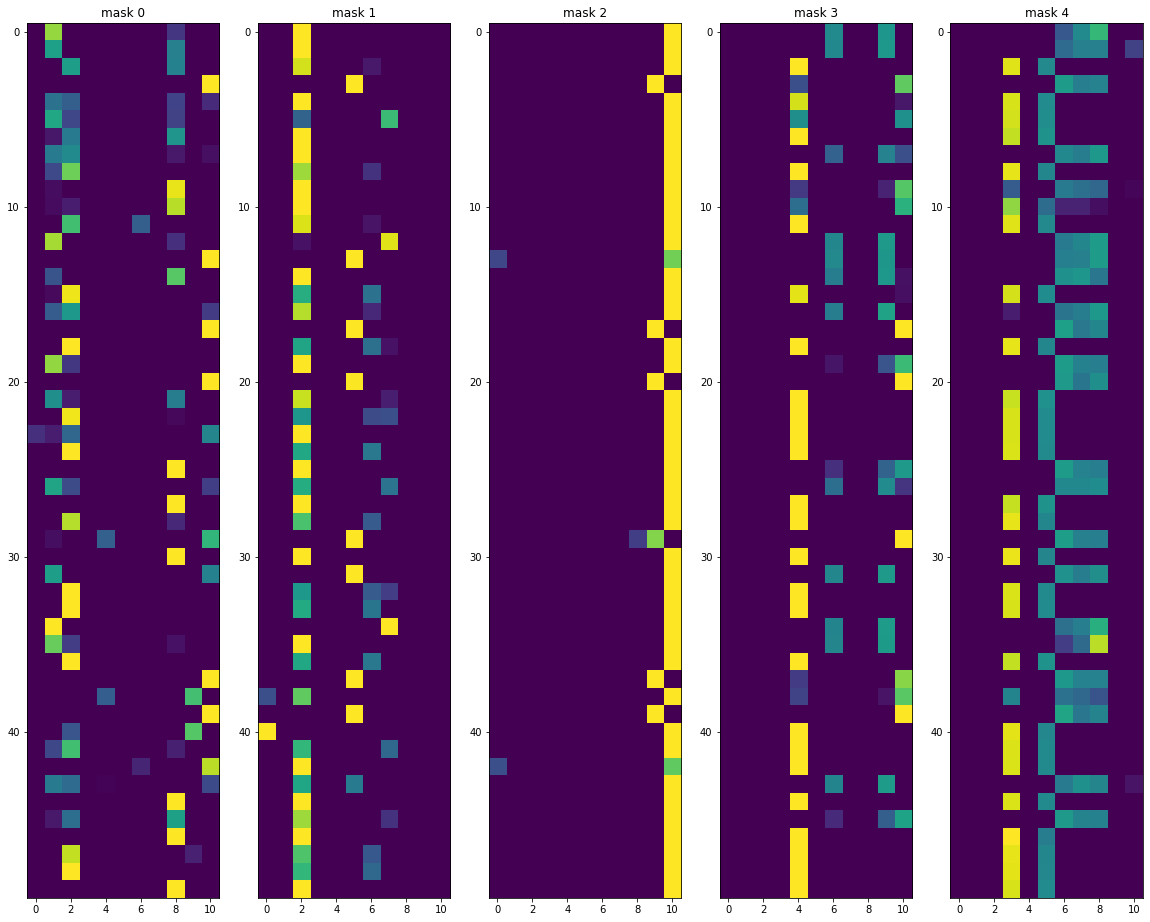

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(5):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
!pip install -q shap # Run this if you do not have shap installed
import shap

     |████████████████████████████████| 569 kB 8.8 MB/s 


##Syn1

In [ ]:
from sklearn.model_selection import GridSearchCV
PARAMETERS = { 'learning_rate': [1e-3, 1e-2, 0.1, 0.3],'max_depth': [3, 5, 10],'n_estimators': [50, 100, 500, 1000],}

In [ ]:
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=2,scoring="accuracy")
model_gs.fit(x_train[1],y_train[1],eval_set=[(x_val[1], y_val[1])],verbose=0)
print(model_gs.best_params_)

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
xgb = XGBClassifier(learning_rate=0.3, max_depth = 3, n_estimators = 100)

In [ ]:
xgb.fit(x_train[1], y_train[1])

XGBClassifier(learning_rate=0.3)

In [ ]:
roc_auc_score(y_test[1], xgb.predict_proba(x_test[1])[:, 1])

0.6748417044185778

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test[1])

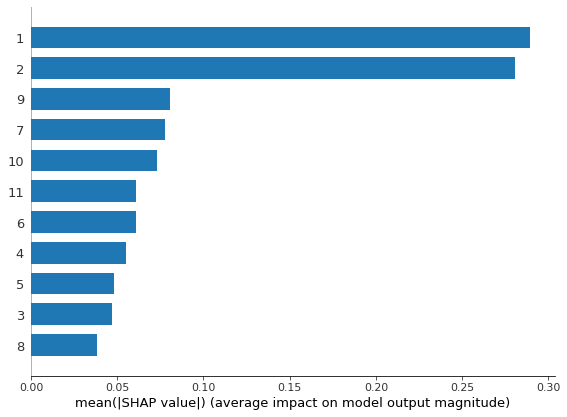

In [ ]:
shap.summary_plot(shap_values, x_test[1], plot_type="bar", feature_names = feature_names, color = 'tab:blue')

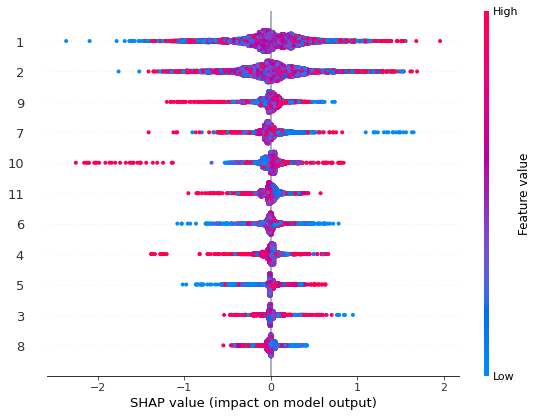

In [ ]:
shap.summary_plot(shap_values, x_test[1], feature_names = feature_names)

##Syn2

In [ ]:
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=2,scoring="accuracy")
model_gs.fit(x_train[2],y_train[2],eval_set=[(x_val[2], y_val[2])],verbose=0)
print(model_gs.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}


In [ ]:
xgb = XGBClassifier(learning_rate=0.01, max_depth = 3, n_estimators = 1000)

In [ ]:
xgb.fit(x_train[2], y_train[2])

XGBClassifier(learning_rate=0.01, n_estimators=1000)

In [ ]:
roc_auc_score(y_test[2], xgb.predict_proba(x_test[2])[:, 1])

0.8948399648303621

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test[2])

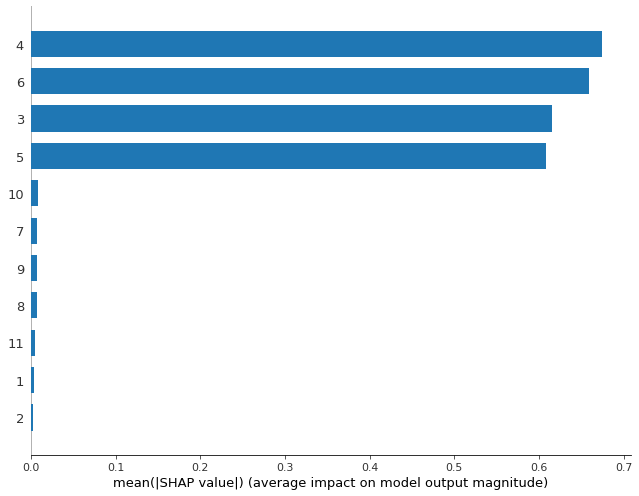

In [ ]:
shap.summary_plot(shap_values, x_test[2], plot_type="bar", feature_names = feature_names, color = "tab:blue", plot_size = (9,7))

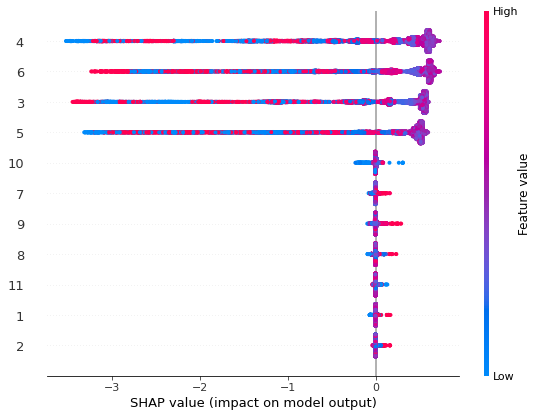

In [ ]:
shap.summary_plot(shap_values, x_test[2], feature_names = feature_names)

##Syn3

In [ ]:
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=2,scoring="accuracy")
model_gs.fit(x_train[3],y_train[3],eval_set=[(x_val[3], y_val[3])],verbose=0)
print(model_gs.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
xgb = XGBClassifier(learning_rate=0.01, max_depth = 5, n_estimators = 500)

In [ ]:
xgb.fit(x_train[3], y_train[3])

XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)

In [ ]:
roc_auc_score(y_test[3], xgb.predict_proba(x_test[3])[:, 1])

0.9000812502316784

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test[3])

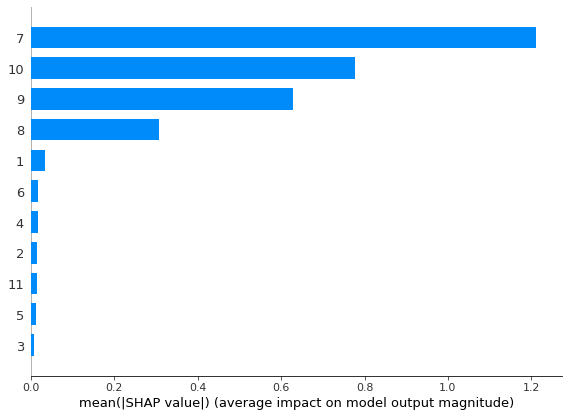

In [ ]:
shap.summary_plot(shap_values, x_test[3], plot_type="bar", feature_names = feature_names)

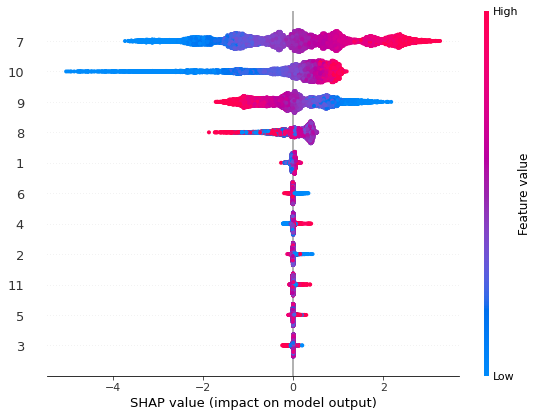

In [ ]:
shap.summary_plot(shap_values, x_test[3], feature_names = feature_names)

##Syn4

In [ ]:
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=2,scoring="accuracy")
model_gs.fit(x_train[4],y_train[4],eval_set=[(x_val[4], y_val[4])],verbose=0)
print(model_gs.best_params_)

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}


In [ ]:
xgb = XGBClassifier(learning_rate=0.01, max_depth = 10, n_estimators = 1000)

In [ ]:
xgb.fit(x_train[4], y_train[4])

XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=1000)

In [ ]:
roc_auc_score(y_test[4], xgb.predict_proba(x_test[4])[:, 1])

0.7845236641149628

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test[4])

In [ ]:
values = []

In [ ]:
for i in range(15):
  values.append(np.abs(shap_values[i])/np.sum(np.abs(shap_values[i]),axis = 0))

([<matplotlib.axis.XTick at 0x7f258c796d10>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11')])

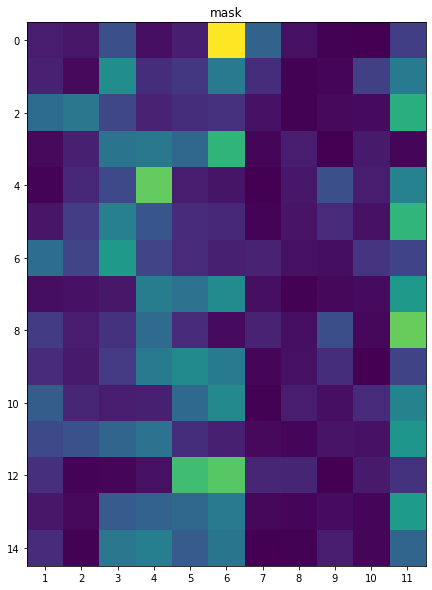

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,10))


im = axs.imshow(values[:15])
axs.set_title(f"mask")
plt.xticks(range(len(feature_names)), feature_names)

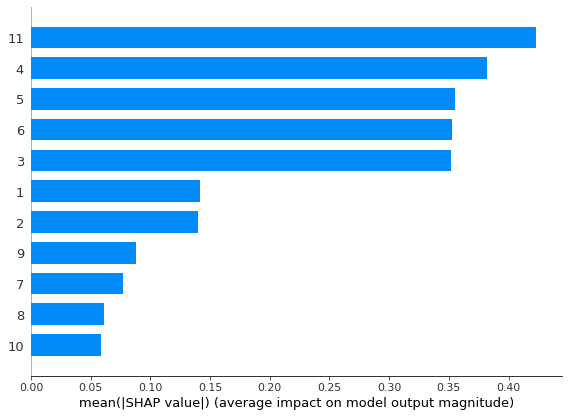

In [ ]:
shap.summary_plot(shap_values, x_test[4], plot_type="bar", feature_names = feature_names)

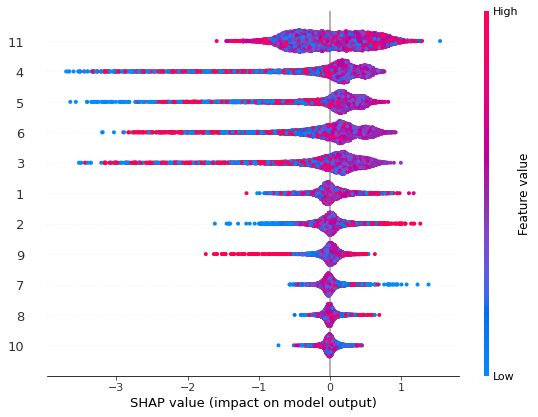

In [ ]:
shap.summary_plot(shap_values, x_test[4], feature_names = feature_names)

##Syn5

In [ ]:
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=2,scoring="accuracy")
model_gs.fit(x_train[5],y_train[5],eval_set=[(x_val[5], y_val[5])],verbose=0)
print(model_gs.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [ ]:
xgb = XGBClassifier(learning_rate=0.1, max_depth = 10, n_estimators = 100)

In [ ]:
xgb.fit(x_train[5], y_train[5])

XGBClassifier(max_depth=10)

In [ ]:
roc_auc_score(y_test[5], xgb.predict_proba(x_test[5])[:, 1])

0.7839504593659353

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test[5])

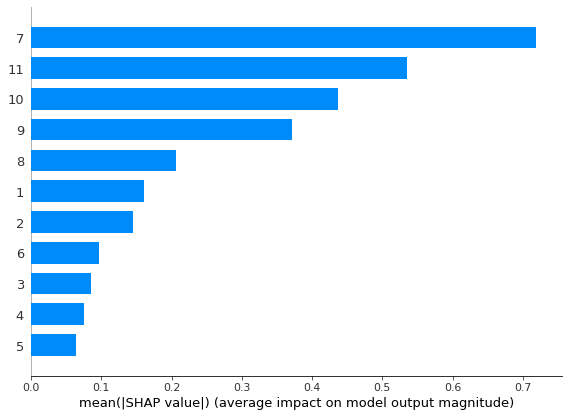

In [ ]:
shap.summary_plot(shap_values, x_test[5], plot_type="bar", feature_names = feature_names)

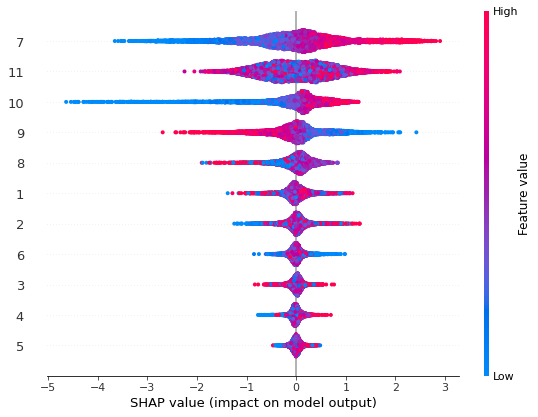

In [ ]:
shap.summary_plot(shap_values, x_test[5], feature_names = feature_names)

##Syn6

In [ ]:
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=2,scoring="accuracy")
model_gs.fit(x_train[6],y_train[6],eval_set=[(x_val[6], y_val[6])],verbose=0)
print(model_gs.best_params_)

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500}


In [ ]:
xgb = XGBClassifier(learning_rate=0.01, max_depth = 10, n_estimators = 500)

In [ ]:
xgb.fit(x_train[6], y_train[6])

XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=500)

In [ ]:
roc_auc_score(y_test[6], xgb.predict_proba(x_test[6])[:, 1])

0.8796128151080311

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test[6])

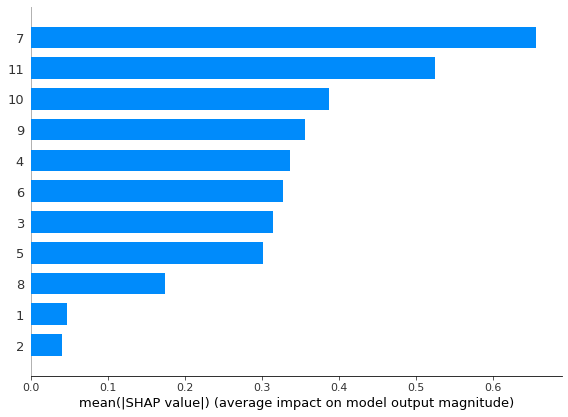

In [ ]:
shap.summary_plot(shap_values, x_test[6], plot_type="bar", feature_names = feature_names)

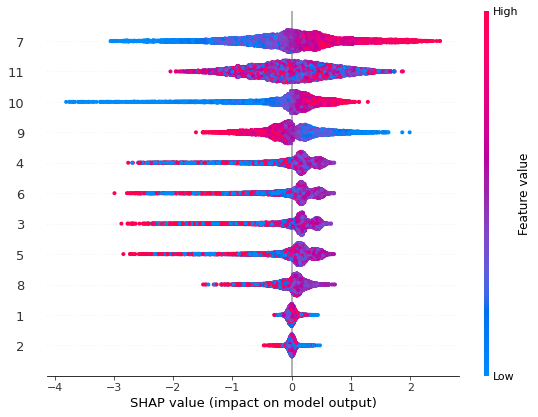

In [ ]:
shap.summary_plot(shap_values, x_test[6], feature_names = feature_names)

# Siêu tham số

## Lambda sparse

In [ ]:
random = np.random.randint(1000, size=50)
random

array([905, 651, 889, 641, 962, 541, 749, 443, 454, 457, 801, 591, 368,
       502, 713, 742, 616, 381, 959, 943, 139, 447, 780, 756, 503, 983,
       437, 761, 554, 220, 209, 620, 998, 200,  97, 161, 480, 591, 502,
       750, 791, 424, 654, 555, 722, 778, 388,  12, 218, 104])

lambda_sparse =   0


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.93557 | train_auc: 0.5196  | val_auc: 0.48829 |  0:00:00s
epoch 1  | loss: 0.76156 | train_auc: 0.53932 | val_auc: 0.5107  |  0:00:01s
epoch 2  | loss: 0.72622 | train_auc: 0.54109 | val_auc: 0.48239 |  0:00:01s
epoch 3  | loss: 0.70518 | train_auc: 0.55771 | val_auc: 0.5034  |  0:00:02s
epoch 4  | loss: 0.69583 | train_auc: 0.5617  | val_auc: 0.50377 |  0:00:03s
epoch 5  | loss: 0.68751 | train_auc: 0.56667 | val_auc: 0.52755 |  0:00:03s
epoch 6  | loss: 0.68374 | train_auc: 0.57696 | val_auc: 0.53408 |  0:00:04s
epoch 7  | loss: 0.68047 | train_auc: 0.58992 | val_auc: 0.53519 |  0:00:04s
epoch 8  | loss: 0.67994 | train_auc: 0.58727 | val_auc: 0.53735 |  0:00:05s
epoch 9  | loss: 0.67711 | train_auc: 0.59903 | val_auc: 0.54154 |  0:00:05s
epoch 10 | loss: 0.67633 | train_auc: 0.59263 | val_auc: 0.53724 |  0:00:06s
epoch 11 | loss: 0.67717 | train_auc: 0.59876 | val_auc: 0.53639 |  0:00:06s
epoch 12 | loss: 0.67456 | train_auc: 0.5955  | val_auc: 0.55786 |  0:00:07s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


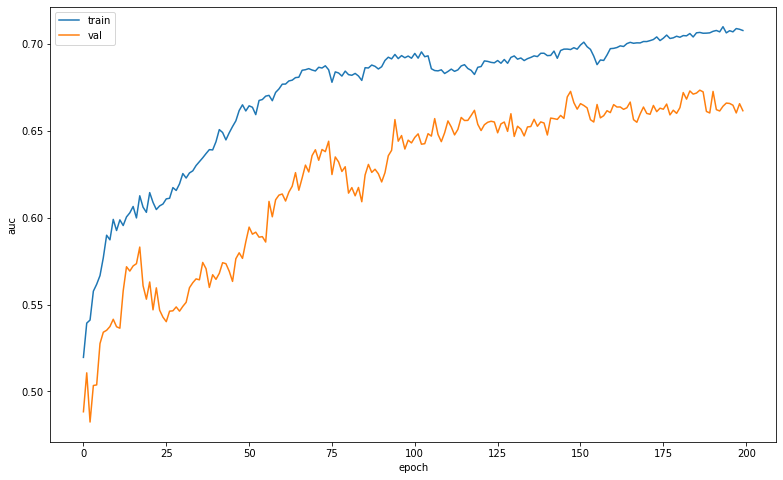

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
No handles with labels found to put in legend.


number of features 0 =  2.377111111111111
number of features 1 =  1.1787777777777777
number of features 2 =  1.0617777777777777
number of features 3 =  1.217111111111111


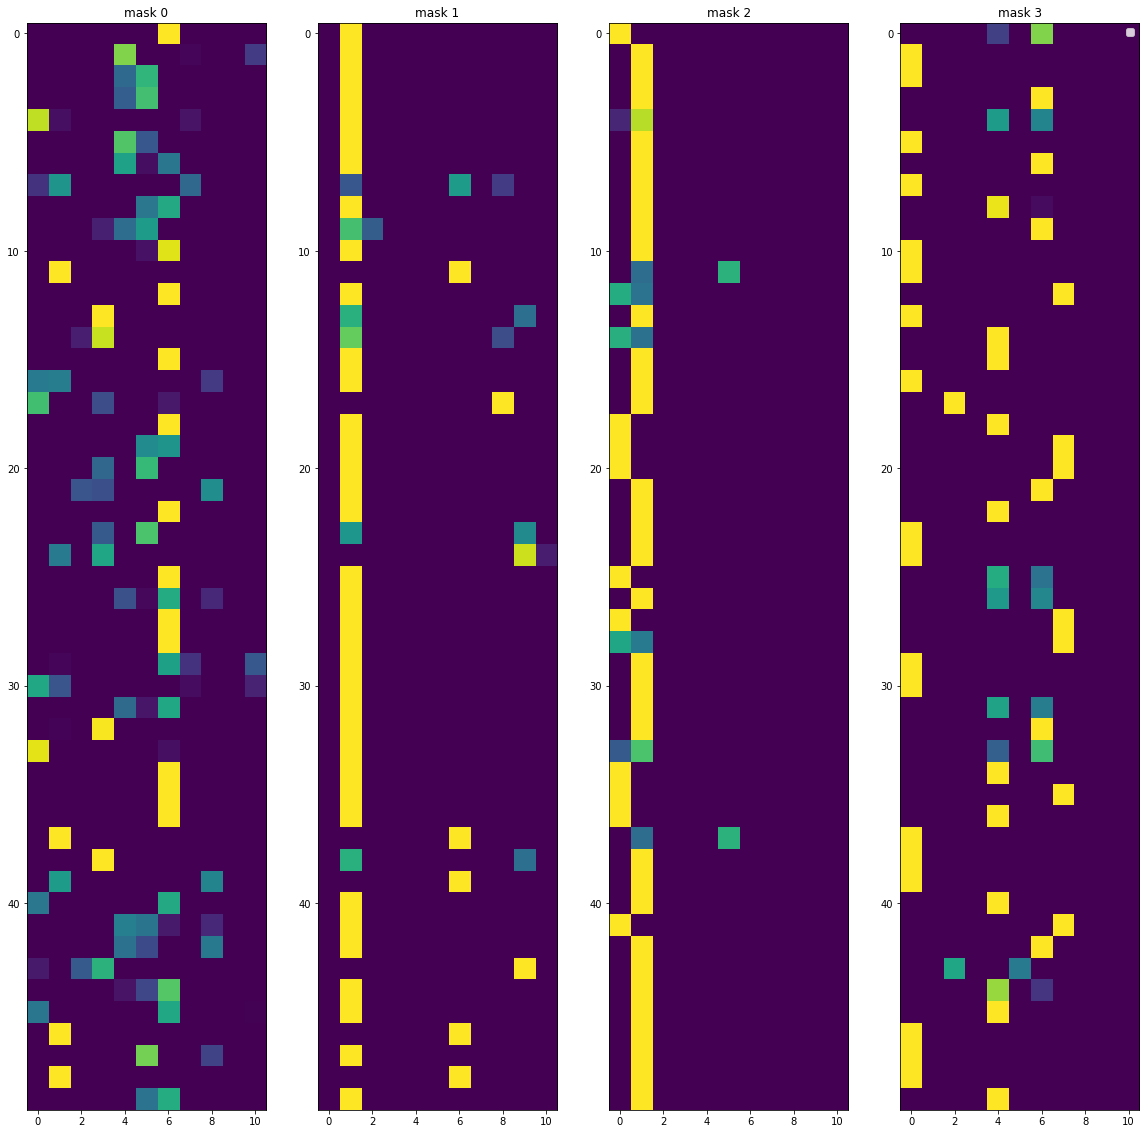

lambda_sparse =   0.1


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.99013 | train_auc: 0.51711 | val_auc: 0.50386 |  0:00:00s
epoch 1  | loss: 0.81888 | train_auc: 0.50906 | val_auc: 0.47938 |  0:00:01s
epoch 2  | loss: 0.77191 | train_auc: 0.52634 | val_auc: 0.51358 |  0:00:01s
epoch 3  | loss: 0.75141 | train_auc: 0.54134 | val_auc: 0.4863  |  0:00:02s
epoch 4  | loss: 0.73453 | train_auc: 0.54392 | val_auc: 0.51649 |  0:00:02s
epoch 5  | loss: 0.73257 | train_auc: 0.53566 | val_auc: 0.53278 |  0:00:03s
epoch 6  | loss: 0.72575 | train_auc: 0.54403 | val_auc: 0.51702 |  0:00:03s
epoch 7  | loss: 0.72264 | train_auc: 0.55844 | val_auc: 0.52538 |  0:00:04s
epoch 8  | loss: 0.71627 | train_auc: 0.56678 | val_auc: 0.51046 |  0:00:04s
epoch 9  | loss: 0.71572 | train_auc: 0.57192 | val_auc: 0.50909 |  0:00:05s
epoch 10 | loss: 0.71317 | train_auc: 0.57274 | val_auc: 0.51645 |  0:00:05s
epoch 11 | loss: 0.70876 | train_auc: 0.57375 | val_auc: 0.53157 |  0:00:06s
epoch 12 | loss: 0.7081  | train_auc: 0.58087 | val_auc: 0.53516 |  0:00:07s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


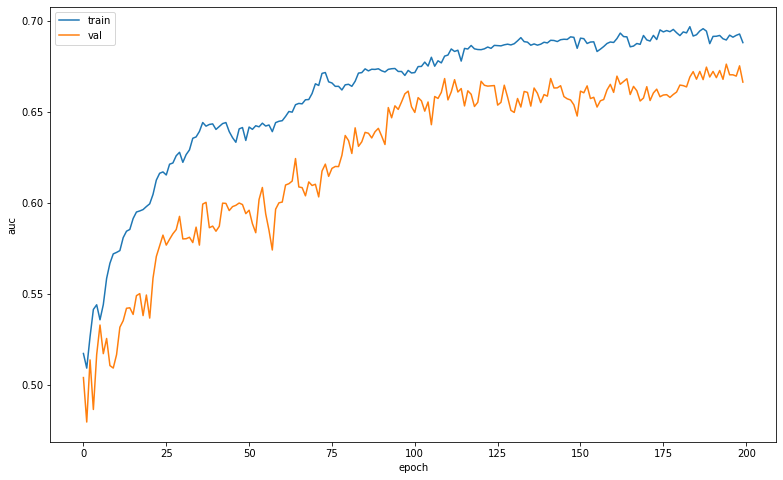

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
No handles with labels found to put in legend.


number of features 0 =  1.6431111111111112
number of features 1 =  1.1565555555555556
number of features 2 =  1.018888888888889
number of features 3 =  1.0364444444444445


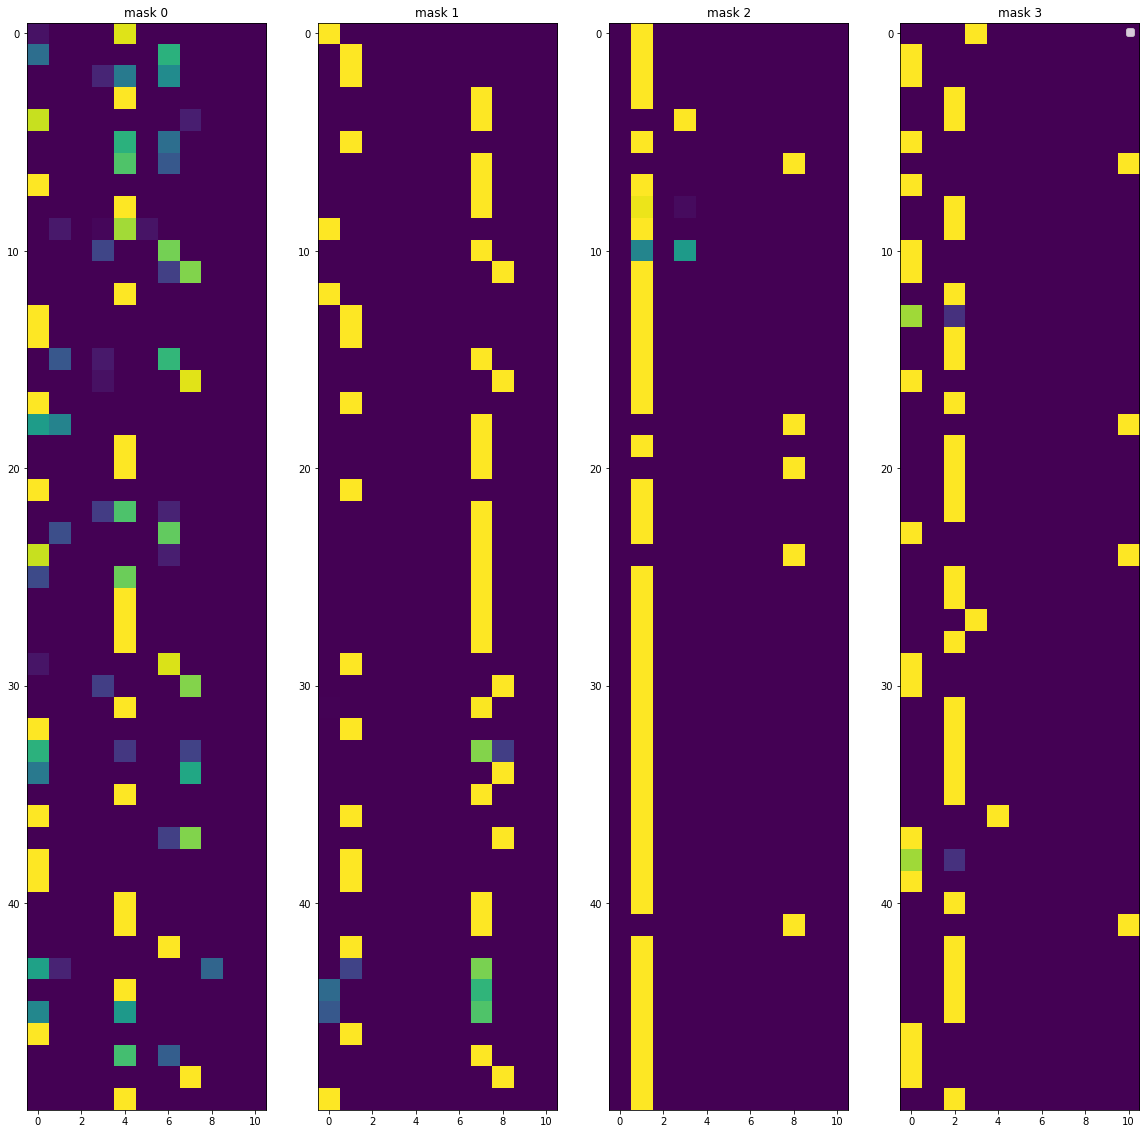

lambda_sparse =   100


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 47.59252| train_auc: 0.51197 | val_auc: 0.50332 |  0:00:00s
epoch 1  | loss: 38.11433| train_auc: 0.53145 | val_auc: 0.51047 |  0:00:01s
epoch 2  | loss: 33.48209| train_auc: 0.53332 | val_auc: 0.4994  |  0:00:01s
epoch 3  | loss: 29.0813 | train_auc: 0.55142 | val_auc: 0.50732 |  0:00:02s
epoch 4  | loss: 26.22171| train_auc: 0.55621 | val_auc: 0.54445 |  0:00:02s
epoch 5  | loss: 23.83447| train_auc: 0.56391 | val_auc: 0.54635 |  0:00:03s
epoch 6  | loss: 21.97429| train_auc: 0.57156 | val_auc: 0.5295  |  0:00:03s
epoch 7  | loss: 19.94824| train_auc: 0.56852 | val_auc: 0.5311  |  0:00:04s
epoch 8  | loss: 18.53167| train_auc: 0.56647 | val_auc: 0.55229 |  0:00:04s
epoch 9  | loss: 17.415  | train_auc: 0.57277 | val_auc: 0.53626 |  0:00:05s
epoch 10 | loss: 16.43771| train_auc: 0.57416 | val_auc: 0.55405 |  0:00:05s
epoch 11 | loss: 15.96567| train_auc: 0.59212 | val_auc: 0.56256 |  0:00:06s
epoch 12 | loss: 15.84528| train_auc: 0.58314 | val_auc: 0.55948 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


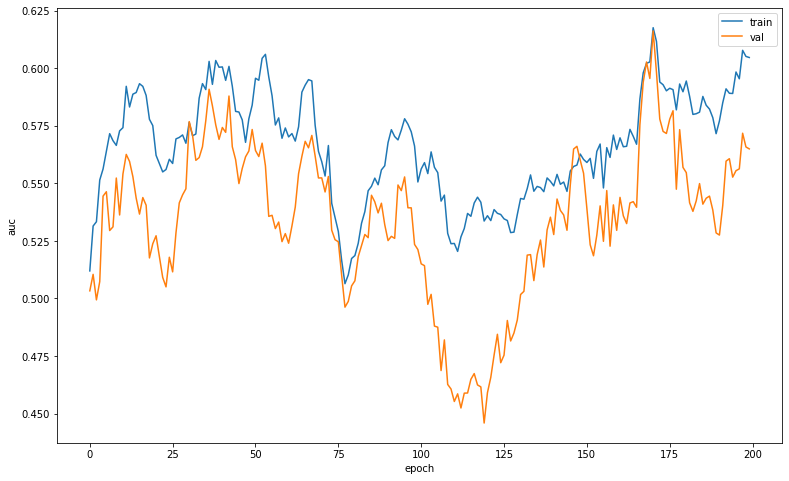

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
No handles with labels found to put in legend.


number of features 0 =  1.0534444444444444
number of features 1 =  1.0101111111111112
number of features 2 =  1.0004444444444445
number of features 3 =  1.0142222222222221


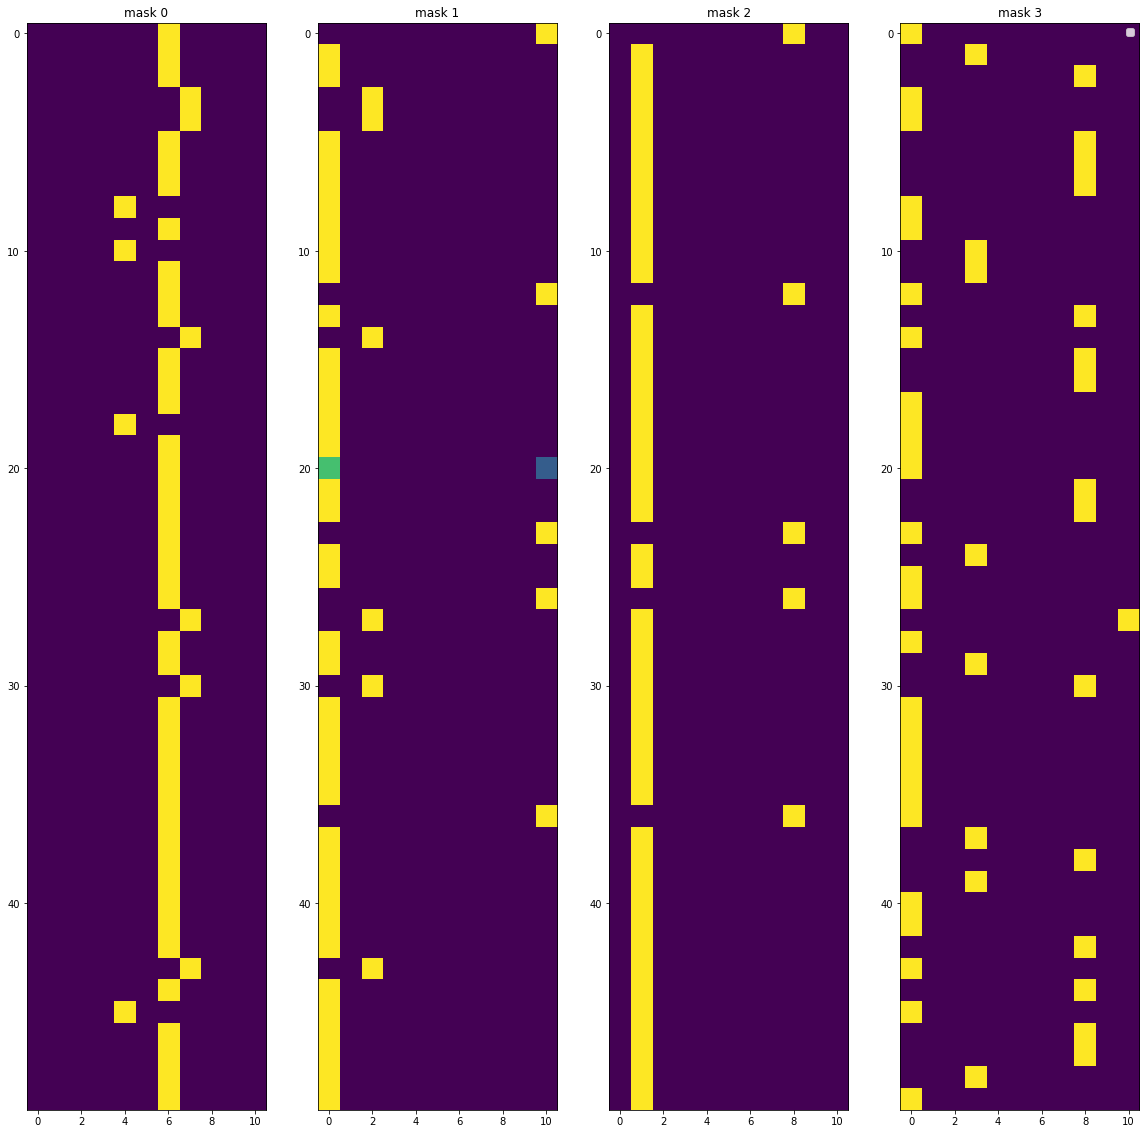

In [ ]:
max_epochs = 200
for lambda_sparse in [0, 0.1, 100]:
  print('lambda_sparse =  ', lambda_sparse)
  clf_1 = TabNetClassifier(
    n_d= 16, n_a= 16, n_steps=4,
    gamma=2, n_ind=2, n_shared=2,
    lambda_sparse=lambda_sparse, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)
  clf_1.fit(
    X_train=x_train[1], y_train=y_train[1],
    eval_set=[(x_train[1], y_train[1]), (x_val[1], y_val[1])],
    eval_name=['train', 'val'],
    max_epochs=max_epochs, patience=200,
    batch_size=3000, vbs=100
 ) 
  plt.figure(figsize=(13,8))
  plt.plot(clf_1.history['train_auc'], label = 'train')
  plt.plot(clf_1.history['val_auc'], label = 'val')
  plt.xlabel('epoch')
  plt.ylabel('auc')
  plt.legend()
  #plt.yscale('log')
  plt.show()
  explain_matrix, masks = clf_1.explain(x_train[1])
  for i in range(4):
    print('number of features',i,'= ', (masks[i][0:] > 0).sum()/masks[i].shape[0])

  fig, axs = plt.subplots(1, 4, figsize=(20,20))
  for i in range(4):
    axs[i].imshow(masks[i][[random]])
    axs[i].set_title(f"mask {i}")
  plt.legend()
  #plt.yscale('log')
  plt.show()

## N_d, N_a

 n_d = n_a =   2


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.59409 | train_auc: 0.49    | val_auc: 0.4782  |  0:00:00s
epoch 1  | loss: 1.16565 | train_auc: 0.4886  | val_auc: 0.48522 |  0:00:00s
epoch 2  | loss: 0.93716 | train_auc: 0.49392 | val_auc: 0.48264 |  0:00:01s
epoch 3  | loss: 0.81532 | train_auc: 0.49603 | val_auc: 0.50426 |  0:00:01s
epoch 4  | loss: 0.74924 | train_auc: 0.49805 | val_auc: 0.51364 |  0:00:02s
epoch 5  | loss: 0.72698 | train_auc: 0.50788 | val_auc: 0.51026 |  0:00:02s
epoch 6  | loss: 0.71722 | train_auc: 0.50292 | val_auc: 0.50932 |  0:00:03s
epoch 7  | loss: 0.71272 | train_auc: 0.50276 | val_auc: 0.50835 |  0:00:03s
epoch 8  | loss: 0.7095  | train_auc: 0.49258 | val_auc: 0.47882 |  0:00:04s
epoch 9  | loss: 0.70769 | train_auc: 0.49381 | val_auc: 0.48248 |  0:00:04s
epoch 10 | loss: 0.7062  | train_auc: 0.49794 | val_auc: 0.48576 |  0:00:05s
epoch 11 | loss: 0.70462 | train_auc: 0.49855 | val_auc: 0.48554 |  0:00:05s
epoch 12 | loss: 0.7041  | train_auc: 0.49595 | val_auc: 0.49702 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


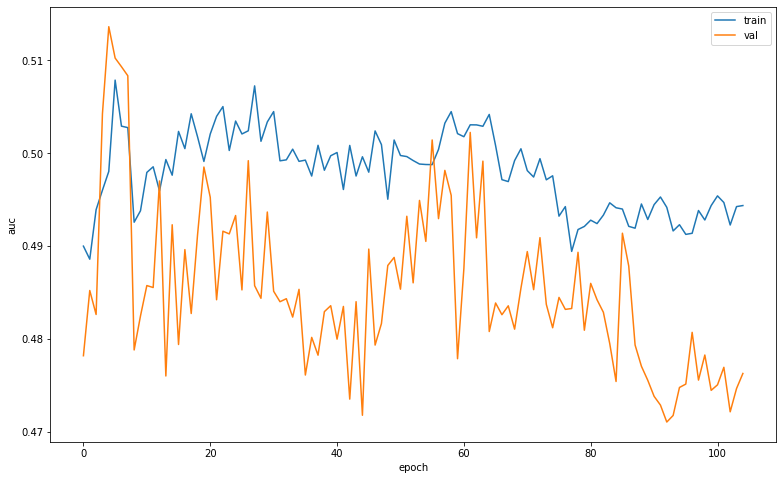

 n_d = n_a =   6


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.92357 | train_auc: 0.50467 | val_auc: 0.49712 |  0:00:00s
epoch 1  | loss: 0.7461  | train_auc: 0.51912 | val_auc: 0.50033 |  0:00:01s
epoch 2  | loss: 0.74657 | train_auc: 0.5277  | val_auc: 0.506   |  0:00:01s
epoch 3  | loss: 0.72402 | train_auc: 0.52333 | val_auc: 0.50535 |  0:00:02s
epoch 4  | loss: 0.71395 | train_auc: 0.51438 | val_auc: 0.51082 |  0:00:02s
epoch 5  | loss: 0.71034 | train_auc: 0.52444 | val_auc: 0.5     |  0:00:02s
epoch 6  | loss: 0.70563 | train_auc: 0.53039 | val_auc: 0.50382 |  0:00:03s
epoch 7  | loss: 0.7017  | train_auc: 0.5239  | val_auc: 0.51445 |  0:00:03s
epoch 8  | loss: 0.70306 | train_auc: 0.53318 | val_auc: 0.51173 |  0:00:04s
epoch 9  | loss: 0.70105 | train_auc: 0.53136 | val_auc: 0.5089  |  0:00:04s
epoch 10 | loss: 0.701   | train_auc: 0.5336  | val_auc: 0.52514 |  0:00:05s
epoch 11 | loss: 0.70061 | train_auc: 0.53343 | val_auc: 0.50652 |  0:00:05s
epoch 12 | loss: 0.69879 | train_auc: 0.54332 | val_auc: 0.53503 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


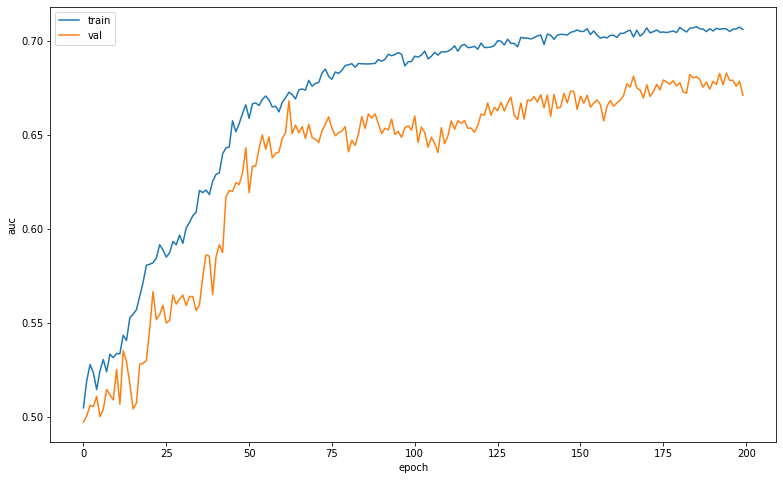

 n_d = n_a =   10


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.0732  | train_auc: 0.50086 | val_auc: 0.49273 |  0:00:00s
epoch 1  | loss: 0.82563 | train_auc: 0.50258 | val_auc: 0.50964 |  0:00:00s
epoch 2  | loss: 0.77273 | train_auc: 0.51572 | val_auc: 0.4955  |  0:00:01s
epoch 3  | loss: 0.73425 | train_auc: 0.51967 | val_auc: 0.47215 |  0:00:01s
epoch 4  | loss: 0.72521 | train_auc: 0.52387 | val_auc: 0.48909 |  0:00:02s
epoch 5  | loss: 0.71278 | train_auc: 0.52359 | val_auc: 0.49381 |  0:00:02s
epoch 6  | loss: 0.70802 | train_auc: 0.53549 | val_auc: 0.5148  |  0:00:03s
epoch 7  | loss: 0.7032  | train_auc: 0.53534 | val_auc: 0.52747 |  0:00:03s
epoch 8  | loss: 0.70022 | train_auc: 0.53826 | val_auc: 0.54293 |  0:00:04s
epoch 9  | loss: 0.697   | train_auc: 0.55236 | val_auc: 0.53633 |  0:00:04s
epoch 10 | loss: 0.69589 | train_auc: 0.55839 | val_auc: 0.54513 |  0:00:05s
epoch 11 | loss: 0.6964  | train_auc: 0.56319 | val_auc: 0.55328 |  0:00:05s
epoch 12 | loss: 0.69311 | train_auc: 0.56197 | val_auc: 0.56135 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


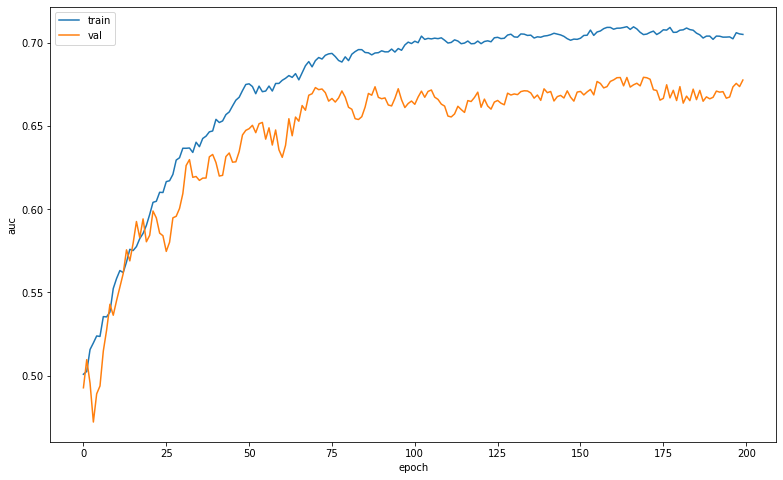

In [ ]:
max_epochs = 200
for i in [2,6,10]:
  print(' n_d = n_a =  ', i)
  clf_1 = TabNetClassifier(
    n_d= i, n_a= i, n_steps=4,
    gamma=2, n_ind=2, n_shared=2,
    lambda_sparse=0.02, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)
  clf_1.fit(
    X_train=x_train[1], y_train=y_train[1],
    eval_set=[(x_train[1], y_train[1]), (x_val[1], y_val[1])],
    eval_name=['train', 'val'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
 ) 
  plt.figure(figsize=(13,8))
  plt.plot(clf_1.history['train_auc'], label = 'train')
  plt.plot(clf_1.history['val_auc'], label = 'val')
  plt.xlabel('epoch')
  plt.ylabel('auc')
  plt.legend()
  #plt.yscale('log')
  plt.show()
  

 n_d = n_a =   4


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.97537 | train_auc: 0.50708 | val_auc: 0.48163 |  0:00:01s
epoch 1  | loss: 0.76865 | train_auc: 0.50738 | val_auc: 0.51779 |  0:00:02s
epoch 2  | loss: 0.75248 | train_auc: 0.51037 | val_auc: 0.5326  |  0:00:03s
epoch 3  | loss: 0.72968 | train_auc: 0.51688 | val_auc: 0.54603 |  0:00:03s
epoch 4  | loss: 0.71742 | train_auc: 0.52112 | val_auc: 0.51936 |  0:00:04s
epoch 5  | loss: 0.71434 | train_auc: 0.51846 | val_auc: 0.5367  |  0:00:04s
epoch 6  | loss: 0.70846 | train_auc: 0.52097 | val_auc: 0.55852 |  0:00:05s
epoch 7  | loss: 0.70459 | train_auc: 0.51999 | val_auc: 0.54339 |  0:00:05s
epoch 8  | loss: 0.70387 | train_auc: 0.53633 | val_auc: 0.56452 |  0:00:06s
epoch 9  | loss: 0.70181 | train_auc: 0.54379 | val_auc: 0.55899 |  0:00:06s
epoch 10 | loss: 0.7003  | train_auc: 0.54526 | val_auc: 0.56106 |  0:00:07s
epoch 11 | loss: 0.69957 | train_auc: 0.55487 | val_auc: 0.55012 |  0:00:07s
epoch 12 | loss: 0.69902 | train_auc: 0.54506 | val_auc: 0.5466  |  0:00:08s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


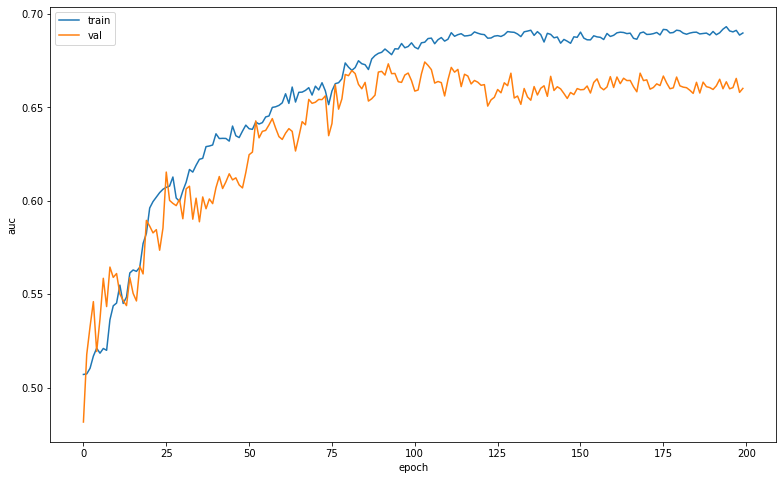

 n_d = n_a =   8


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.80633 | train_auc: 0.48937 | val_auc: 0.49326 |  0:00:00s
epoch 1  | loss: 0.74993 | train_auc: 0.49871 | val_auc: 0.47835 |  0:00:01s
epoch 2  | loss: 0.72028 | train_auc: 0.51161 | val_auc: 0.51211 |  0:00:01s
epoch 3  | loss: 0.70898 | train_auc: 0.52399 | val_auc: 0.51797 |  0:00:01s
epoch 4  | loss: 0.70865 | train_auc: 0.53023 | val_auc: 0.52689 |  0:00:02s
epoch 5  | loss: 0.70563 | train_auc: 0.52847 | val_auc: 0.509   |  0:00:02s
epoch 6  | loss: 0.70127 | train_auc: 0.52715 | val_auc: 0.50746 |  0:00:03s
epoch 7  | loss: 0.7016  | train_auc: 0.52827 | val_auc: 0.50357 |  0:00:03s
epoch 8  | loss: 0.70172 | train_auc: 0.53219 | val_auc: 0.48603 |  0:00:04s
epoch 9  | loss: 0.70074 | train_auc: 0.53735 | val_auc: 0.52119 |  0:00:04s
epoch 10 | loss: 0.70049 | train_auc: 0.53557 | val_auc: 0.51439 |  0:00:05s
epoch 11 | loss: 0.69931 | train_auc: 0.53539 | val_auc: 0.49427 |  0:00:05s
epoch 12 | loss: 0.69937 | train_auc: 0.53754 | val_auc: 0.50508 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


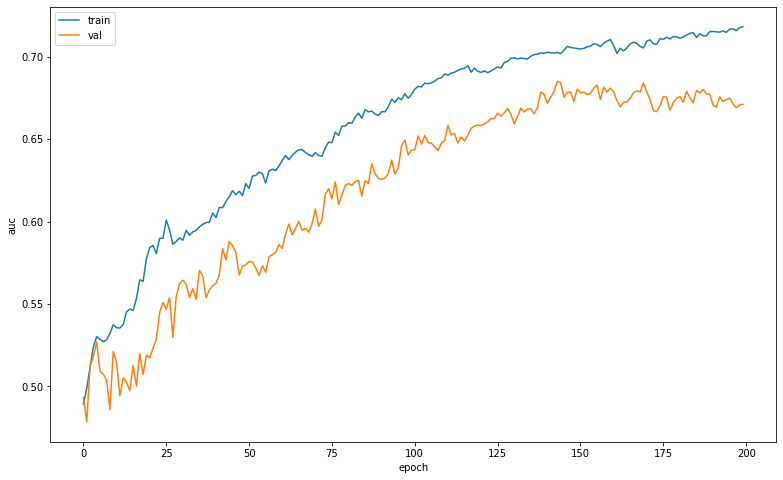

 n_d = n_a =   16


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94197 | train_auc: 0.51957 | val_auc: 0.51018 |  0:00:00s
epoch 1  | loss: 0.81976 | train_auc: 0.51933 | val_auc: 0.51745 |  0:00:01s
epoch 2  | loss: 0.7346  | train_auc: 0.53417 | val_auc: 0.48968 |  0:00:02s
epoch 3  | loss: 0.72646 | train_auc: 0.55395 | val_auc: 0.52262 |  0:00:03s
epoch 4  | loss: 0.70653 | train_auc: 0.55859 | val_auc: 0.53921 |  0:00:04s
epoch 5  | loss: 0.7047  | train_auc: 0.55759 | val_auc: 0.53325 |  0:00:05s
epoch 6  | loss: 0.69694 | train_auc: 0.56702 | val_auc: 0.534   |  0:00:05s
epoch 7  | loss: 0.69617 | train_auc: 0.56799 | val_auc: 0.53886 |  0:00:06s
epoch 8  | loss: 0.69209 | train_auc: 0.58454 | val_auc: 0.55265 |  0:00:06s
epoch 9  | loss: 0.68806 | train_auc: 0.59006 | val_auc: 0.55991 |  0:00:07s
epoch 10 | loss: 0.68052 | train_auc: 0.59967 | val_auc: 0.55353 |  0:00:07s
epoch 11 | loss: 0.68    | train_auc: 0.60613 | val_auc: 0.56629 |  0:00:08s
epoch 12 | loss: 0.68001 | train_auc: 0.60276 | val_auc: 0.55606 |  0:00:09s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


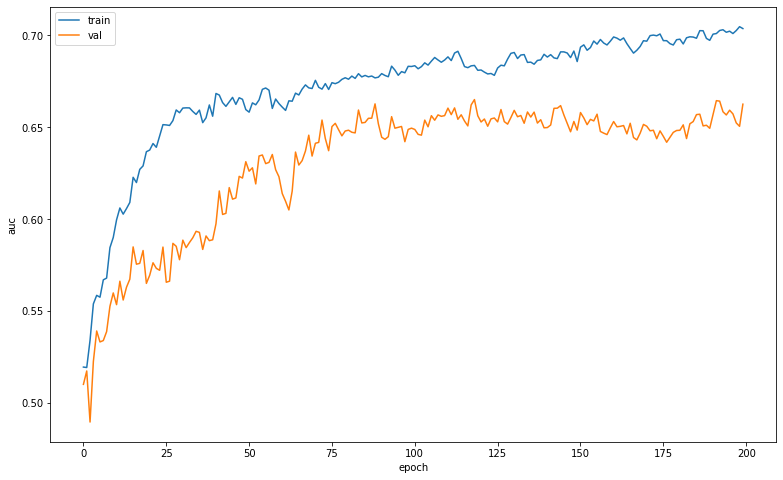

 n_d = n_a =   32


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.15279 | train_auc: 0.5332  | val_auc: 0.49693 |  0:00:00s
epoch 1  | loss: 0.80574 | train_auc: 0.52319 | val_auc: 0.50526 |  0:00:00s
epoch 2  | loss: 0.76083 | train_auc: 0.54765 | val_auc: 0.48406 |  0:00:01s
epoch 3  | loss: 0.73067 | train_auc: 0.55843 | val_auc: 0.53241 |  0:00:02s
epoch 4  | loss: 0.71988 | train_auc: 0.57338 | val_auc: 0.5312  |  0:00:02s
epoch 5  | loss: 0.70989 | train_auc: 0.57714 | val_auc: 0.54534 |  0:00:03s
epoch 6  | loss: 0.69794 | train_auc: 0.58506 | val_auc: 0.53261 |  0:00:03s
epoch 7  | loss: 0.68933 | train_auc: 0.598   | val_auc: 0.55095 |  0:00:04s
epoch 8  | loss: 0.68452 | train_auc: 0.61082 | val_auc: 0.54791 |  0:00:04s
epoch 9  | loss: 0.67865 | train_auc: 0.61644 | val_auc: 0.54219 |  0:00:05s
epoch 10 | loss: 0.67727 | train_auc: 0.62225 | val_auc: 0.56598 |  0:00:05s
epoch 11 | loss: 0.6765  | train_auc: 0.62064 | val_auc: 0.55542 |  0:00:06s
epoch 12 | loss: 0.67466 | train_auc: 0.62833 | val_auc: 0.54963 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


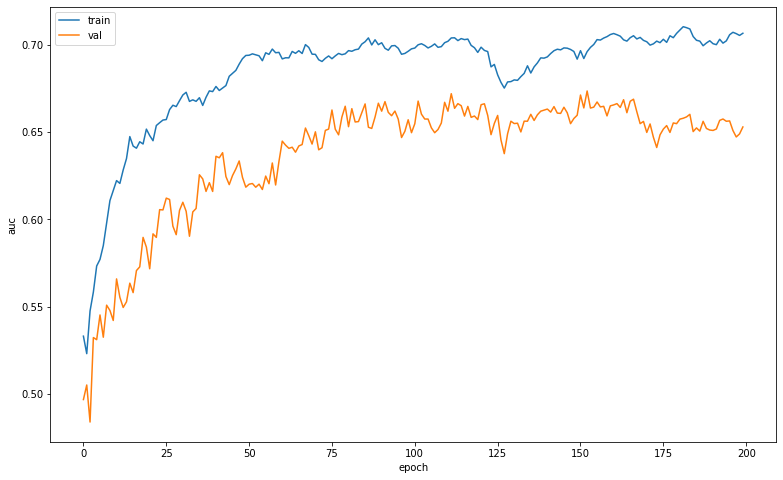

 n_d = n_a =   64


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.46917 | train_auc: 0.50382 | val_auc: 0.51604 |  0:00:00s
epoch 1  | loss: 1.07982 | train_auc: 0.53429 | val_auc: 0.51094 |  0:00:01s
epoch 2  | loss: 0.81475 | train_auc: 0.55632 | val_auc: 0.53018 |  0:00:01s
epoch 3  | loss: 0.75276 | train_auc: 0.56605 | val_auc: 0.54727 |  0:00:02s
epoch 4  | loss: 0.72531 | train_auc: 0.5714  | val_auc: 0.52267 |  0:00:02s
epoch 5  | loss: 0.71637 | train_auc: 0.591   | val_auc: 0.56814 |  0:00:03s
epoch 6  | loss: 0.69488 | train_auc: 0.59322 | val_auc: 0.56339 |  0:00:03s
epoch 7  | loss: 0.69157 | train_auc: 0.60578 | val_auc: 0.53483 |  0:00:04s
epoch 8  | loss: 0.6862  | train_auc: 0.61346 | val_auc: 0.55796 |  0:00:04s
epoch 9  | loss: 0.67992 | train_auc: 0.62099 | val_auc: 0.57577 |  0:00:05s
epoch 10 | loss: 0.68353 | train_auc: 0.62207 | val_auc: 0.55658 |  0:00:05s
epoch 11 | loss: 0.67824 | train_auc: 0.62273 | val_auc: 0.57294 |  0:00:06s
epoch 12 | loss: 0.67697 | train_auc: 0.62741 | val_auc: 0.56161 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


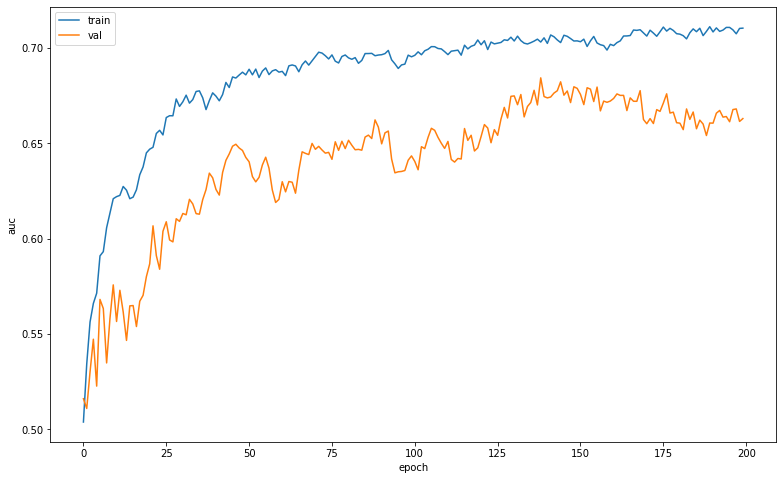

 n_d = n_a =   128


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.00631 | train_auc: 0.51123 | val_auc: 0.48366 |  0:00:00s
epoch 1  | loss: 1.93731 | train_auc: 0.55385 | val_auc: 0.54227 |  0:00:01s
epoch 2  | loss: 1.12086 | train_auc: 0.54454 | val_auc: 0.52308 |  0:00:01s
epoch 3  | loss: 0.87464 | train_auc: 0.53353 | val_auc: 0.49547 |  0:00:02s
epoch 4  | loss: 0.8179  | train_auc: 0.56098 | val_auc: 0.52522 |  0:00:02s
epoch 5  | loss: 0.75936 | train_auc: 0.56377 | val_auc: 0.53047 |  0:00:03s
epoch 6  | loss: 0.73326 | train_auc: 0.57294 | val_auc: 0.52595 |  0:00:03s
epoch 7  | loss: 0.7216  | train_auc: 0.57744 | val_auc: 0.54376 |  0:00:04s
epoch 8  | loss: 0.70225 | train_auc: 0.59197 | val_auc: 0.53474 |  0:00:04s
epoch 9  | loss: 0.69532 | train_auc: 0.59252 | val_auc: 0.55129 |  0:00:05s
epoch 10 | loss: 0.69384 | train_auc: 0.6108  | val_auc: 0.54003 |  0:00:05s
epoch 11 | loss: 0.6859  | train_auc: 0.62028 | val_auc: 0.57153 |  0:00:06s
epoch 12 | loss: 0.67881 | train_auc: 0.63073 | val_auc: 0.56922 |  0:00:06s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


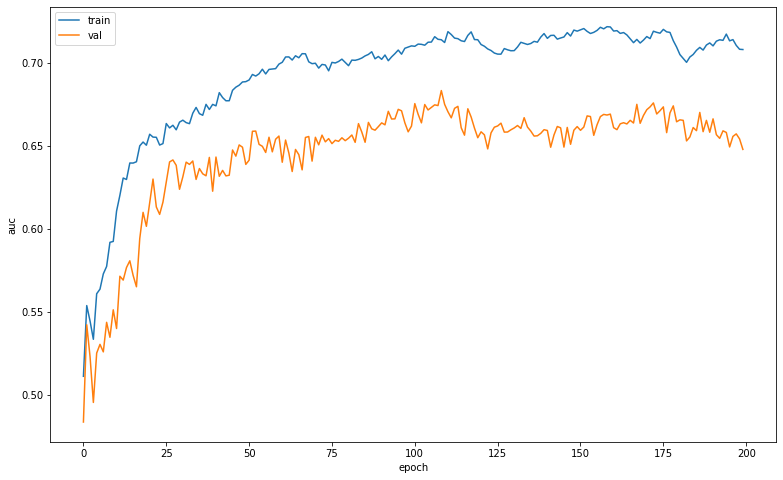

 n_d = n_a =   256


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.58108 | train_auc: 0.49822 | val_auc: 0.53331 |  0:00:00s
epoch 1  | loss: 3.59595 | train_auc: 0.5377  | val_auc: 0.51838 |  0:00:01s
epoch 2  | loss: 1.74505 | train_auc: 0.54159 | val_auc: 0.52105 |  0:00:01s
epoch 3  | loss: 1.46497 | train_auc: 0.5615  | val_auc: 0.53891 |  0:00:02s
epoch 4  | loss: 1.10202 | train_auc: 0.56318 | val_auc: 0.52403 |  0:00:02s
epoch 5  | loss: 0.87904 | train_auc: 0.55394 | val_auc: 0.5462  |  0:00:03s
epoch 6  | loss: 0.82927 | train_auc: 0.57278 | val_auc: 0.52337 |  0:00:03s
epoch 7  | loss: 0.75197 | train_auc: 0.58423 | val_auc: 0.5808  |  0:00:04s
epoch 8  | loss: 0.73837 | train_auc: 0.61561 | val_auc: 0.58012 |  0:00:04s
epoch 9  | loss: 0.69806 | train_auc: 0.6029  | val_auc: 0.53893 |  0:00:05s
epoch 10 | loss: 0.69426 | train_auc: 0.61828 | val_auc: 0.56852 |  0:00:05s
epoch 11 | loss: 0.6846  | train_auc: 0.62691 | val_auc: 0.57773 |  0:00:06s
epoch 12 | loss: 0.67676 | train_auc: 0.63006 | val_auc: 0.55883 |  0:00:07s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


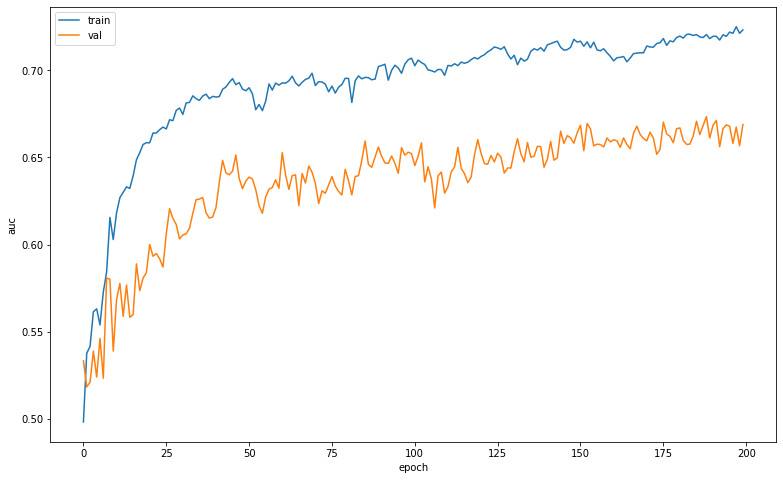

 n_d = n_a =   512


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.82804| train_auc: 0.52023 | val_auc: 0.51653 |  0:00:01s
epoch 1  | loss: 5.91447 | train_auc: 0.54666 | val_auc: 0.55065 |  0:00:02s
epoch 2  | loss: 2.90177 | train_auc: 0.5169  | val_auc: 0.51213 |  0:00:03s
epoch 3  | loss: 1.90079 | train_auc: 0.53575 | val_auc: 0.5258  |  0:00:04s
epoch 4  | loss: 1.26474 | train_auc: 0.55265 | val_auc: 0.5534  |  0:00:05s
epoch 5  | loss: 1.01643 | train_auc: 0.512   | val_auc: 0.54084 |  0:00:06s
epoch 6  | loss: 0.91253 | train_auc: 0.56706 | val_auc: 0.52599 |  0:00:07s
epoch 7  | loss: 0.7792  | train_auc: 0.53924 | val_auc: 0.51663 |  0:00:08s
epoch 8  | loss: 0.7911  | train_auc: 0.57875 | val_auc: 0.53927 |  0:00:09s
epoch 9  | loss: 0.75603 | train_auc: 0.56295 | val_auc: 0.51133 |  0:00:10s
epoch 10 | loss: 0.7253  | train_auc: 0.57587 | val_auc: 0.55903 |  0:00:11s
epoch 11 | loss: 0.71513 | train_auc: 0.57476 | val_auc: 0.55569 |  0:00:12s
epoch 12 | loss: 0.71545 | train_auc: 0.5951  | val_auc: 0.56255 |  0:00:13s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


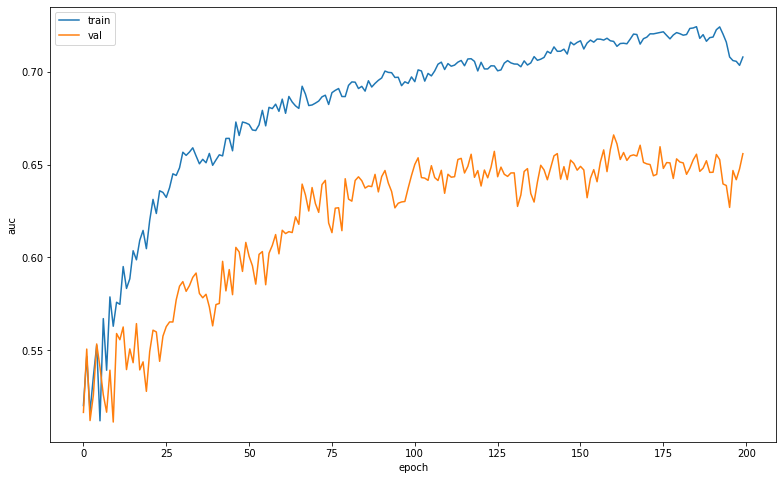

 n_d = n_a =   1024


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 17.25612| train_auc: 0.50677 | val_auc: 0.47371 |  0:00:03s
epoch 1  | loss: 12.31977| train_auc: 0.51516 | val_auc: 0.49676 |  0:00:06s
epoch 2  | loss: 4.99032 | train_auc: 0.49952 | val_auc: 0.51841 |  0:00:09s
epoch 3  | loss: 3.20589 | train_auc: 0.52055 | val_auc: 0.4944  |  0:00:12s
epoch 4  | loss: 2.54916 | train_auc: 0.51765 | val_auc: 0.47759 |  0:00:15s
epoch 5  | loss: 1.73247 | train_auc: 0.51368 | val_auc: 0.50462 |  0:00:19s
epoch 6  | loss: 1.54621 | train_auc: 0.53119 | val_auc: 0.53118 |  0:00:22s
epoch 7  | loss: 1.02265 | train_auc: 0.51035 | val_auc: 0.47363 |  0:00:25s
epoch 8  | loss: 1.307   | train_auc: 0.52044 | val_auc: 0.47119 |  0:00:28s
epoch 9  | loss: 1.16749 | train_auc: 0.52376 | val_auc: 0.50617 |  0:00:31s
epoch 10 | loss: 0.86494 | train_auc: 0.52833 | val_auc: 0.47456 |  0:00:34s
epoch 11 | loss: 1.02362 | train_auc: 0.53507 | val_auc: 0.49198 |  0:00:38s
epoch 12 | loss: 0.88125 | train_auc: 0.54371 | val_auc: 0.50742 |  0:00:41s

/content/Thesis/Code/callbacks.py:155: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


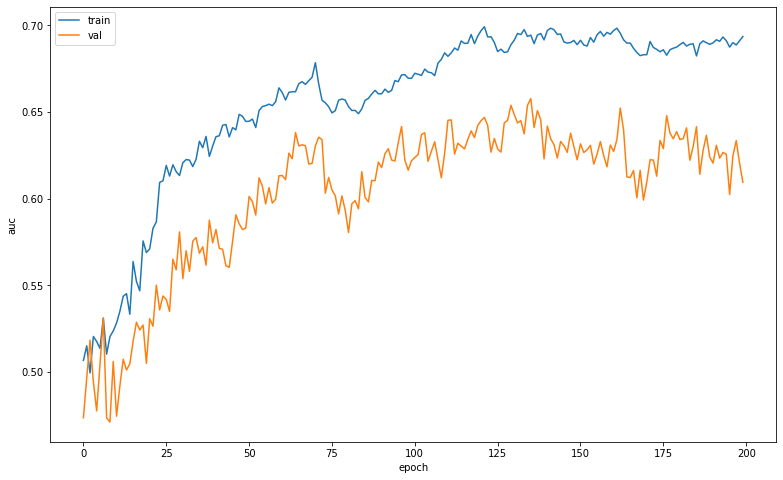

 n_d = n_a =   2048


/content/Thesis/Code/abstract_model.py:74: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


RuntimeError: ignored

In [ ]:
max_epochs = 200
for i in range(2, 15):
  print(' n_d = n_a =  ', 2**i)
  clf_1 = TabNetClassifier(
    n_d= 2**i, n_a= 2**i, n_steps=4,
    gamma=2, n_ind=2, n_shared=2,
    lambda_sparse=0.02, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)
  clf_1.fit(
    X_train=x_train[1], y_train=y_train[1],
    eval_set=[(x_train[1], y_train[1]), (x_val[1], y_val[1])],
    eval_name=['train', 'val'],
    max_epochs=max_epochs, patience=100,
    batch_size=3000, vbs=100
 ) 
  plt.figure(figsize=(13,8))
  plt.plot(clf_1.history['train_auc'], label = 'train')
  plt.plot(clf_1.history['val_auc'], label = 'val')
  plt.xlabel('epoch')
  plt.ylabel('auc')
  plt.legend()
  #plt.yscale('log')
  plt.show()
  